# 🌞 Évaluation et Prévision des Énergies Renouvelables Variables

## 🌍 Introduction

Dans un contexte de transition énergétique, les **énergies renouvelables variables** comme le photovoltaïque jouent un rôle central dans la production électrique en France métropolitaine. Cependant, leur nature intermittente et dépendante des conditions climatiques rend leur gestion complexe, nécessitant des prévisions précises pour anticiper les variations de puissance et maintenir la stabilité du réseau électrique.

## 🎯 Objectif du Projet

Ce projet vise à **prédire les facteurs de capacité** des installations photovoltaïques à partir des **données climatiques locales** afin d’évaluer avec précision la **production horaire d’énergie solaire**. 

### 🔍 Pourquoi passer par les **facteurs de capacité** ?

#### Une mesure plus universelle et robuste
Le facteur de capacité exprime la fraction de la production réelle par rapport à la production théorique maximale. Cela en fait une métrique universelle, permettant de :  
- Comparer les performances entre régions aux conditions climatiques variables.  
- Analyser les tendances temporelles sans être influencé par des extensions de parcs ou des variations de capacité installée. 

#### Une mesure indépendante de la taille des parcs photovoltaïques
La production brute d’énergie solaire varie directement en fonction de la **capacité installée** des parcs photovoltaïques. Par conséquent, comparer les productions de différentes régions ou prévoir leur évolution est biaisé par les différences de taille des installations. 

Les **facteurs de capacité** permettent de contourner cette limitation en exprimant la performance des parcs photovoltaïques sous une forme **normalisée**. Ils reflètent l’efficacité des installations solaires en fonction des **conditions climatiques locales** , indépendamment de leur capacité nominale. 

#### Optimisation du réseau électrique
Une prévision précise des facteurs de capacité est essentielle pour :  
- Anticiper les variations de production horaire ou journalière.  
- Mieux intégrer les énergies renouvelables dans le réseau électrique.  
- Réduire les coûts associés au stockage ou à la surcapacité en ajustant les ressources en temps réel.

## 🌞 Relevé des Données
En s’appuyant sur les **observations historiques des facteurs de capacité** et les **données climatiques**, ce projet propose de prédire les performances des parcs photovoltaïques par région de la France métropolitaine. Cette approche permet de mieux évaluer l’impact des énergies renouvelables dans le **mix énergétique** et de contribuer à la stabilité du réseau électrique face à la montée en puissance des énergies intermittentes.


## 🛠 Architecture du Projet

1. **Récupération et Traitement des Données**
   - Collecte de données météorologiques
   - Collecte des données de facteurs de capacité 
   - Nettoyage et mise en forme des données pour assurer leur fiabilité.
     
2. **Analyse Descriptive et Représentation Graphique**
   - Exploration des relations entre variables climatiques et facteurs de capacité.

3. **Modélisation**
   - Développement de modèles prédictifs pour anticiper les variations.
   - Validation à l’aide d’indicateurs statistiques.



# I. Récupération et traitement des données




## 📊 Etape 1 : Collecte des données des facteurs de capacité des installations photovoltaïques (PV) en France

Il nous a d'abord fallu **calculer les facteurs de capacité** des installations photovoltaïques (PV) en France, 
en nous basant sur les données de **production solaire mensuelle** et des **capacités installées** 
des parcs PV pour chaque région française.

Les données proviennent de [OpenData Réseaux Energies](https://opendata.reseaux-energies.fr) pour les régions françaises métropolitaines, sur la période **2014 - 2019**.

La formule utilisée est la suivante :

$$
\text{Facteur de Capacité} = \frac{\text{Production Solaire Observée}}{\text{Capacité Installée} \times \text{Durée}}
$$

où :  
- **Production Solaire Observée**  
- **Capacité Installée**  
- **Durée** correspond au nombre d'heures dans un mois soit environ **24 × 30.5 = 732 heures**

Les trois programmes suivants permettent de réaliser ces opérations: 

| Programme       | Données Collectées                     | Période     | Résultat CSV                         |
|-----------------|---------------------------------------|------------|--------------------------------------|
| **Programme PV1** | Production solaire mensuelle par région | 2014-2019  | production_solaire_2014_2019.csv     |
| **Programme PV2** | Capacité solaire installée par région  | 2014-2019  | parc_installe_solaire_2014_2019.csv  |
| **Programme PV3** | Facteurs de capacité moyens par région  | 2014-2019  | normalized_production_solaire_2014_2019.csv |



In [1]:
!pip install requests
!pip install xarray netcdf4
!pip install matplotlib
!pip install ipywidgets
!pip install --upgrade ipywidgets
!pip install jupyterlab_widgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.8 MB/s eta 0:00:00


### **Programme PV1 :**
Ce programme récupère la **production solaire mensuelle** des différentes régions françaises entre **2014 et 2019** 
via l’API d’OpenDataSoft.

## **Étapes clés :**
1. **Requête API :**
   - Utilisation d'URLs spécifiques pour chaque région.
   - Filtrage des données par mois dans la plage **2014-01 à 2019-12**.

2. **Traitement des Données :**
   - Extraction des champs : `mois`, `region`, `production_solaire`.
   - Filtrage pour inclure uniquement les mois concernés.

3. **Structuration :**
   - Création d’un **DataFrame** où chaque région correspond à une colonne et chaque ligne représente un mois.

4. **Exportation :**
   - Les données finales sont exportées au format CSV sous le nom : **`production_solaire_2014_2019.csv`**.

In [2]:
import requests
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Liste des URLs pour chaque région
urls = {
    "Auvergne-Rhône-Alpes": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Auvergne-Rh%C3%B4ne-Alpes%22",
    "Bourgogne-Franche-Comté": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Bourgogne-Franche-Comt%C3%A9%22",
    "Bretagne": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Bretagne%22",
    "Centre-Val de Loire": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Centre-Val%20de%20Loire%22",
    "Grand Est": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Grand%20Est%22",
    "Hauts-de-France": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Hauts-de-France%22",
    "Île-de-France": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22%C3%8Ele-de-France%22",
    "Normandie": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Normandie%22",
    "Nouvelle-Aquitaine": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Nouvelle-Aquitaine%22",
    "Occitanie": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Occitanie%22",
    "Pays de la Loire": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Pays%20de%20la%20Loire%22",
    "Provence-Alpes-Côte d'Azur": "/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/records?select=mois%2Cregion%2Cproduction_solaire&where=mois%3C2020&limit=100&refine=region%3A%22Provence-Alpes-C%C3%B4te%20d'Azur%22"
}

# Base URL pour l'API
base_url = "https://odre.opendatasoft.com"

# Configurer le retry pour gérer les échecs temporaires
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))

# Liste pour collecter les données de toutes les régions
all_data = []

# Plage de dates filtrées
date_range_start = "2014-01"
date_range_end = "2019-12"

for region, endpoint in urls.items():
    try:
        # Effectuer une requête GET pour chaque région
        response = session.get(base_url + endpoint, timeout=30)
        response.raise_for_status()  # Vérifier si la requête a réussi

        # Charger les données JSON
        data = response.json()
        results = data.get("results", [])

        # Extraire les champs pertinents en filtrant par date
        formatted_data = [
            {
                "mois": record.get("mois"),
                "region": region,
                "production_solaire": record.get("production_solaire")
            }
            for record in results
            if date_range_start <= record.get("mois", "") <= date_range_end
        ]

        # Ajouter les données de cette région à la liste globale
        all_data.extend(formatted_data)

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la récupération des données pour {region} : {e}")

# Créer un DataFrame pandas avec toutes les données
df = pd.DataFrame(all_data)

# Réorganiser le format du tableau pour avoir les régions comme colonnes
df_pivot = df.pivot(index="mois", columns="region", values="production_solaire").reset_index()
df_pivot.columns.name = None  # Supprimer le nom des colonnes multi-index
df_pivot['mois'] = pd.to_datetime(df_pivot['mois'], format='%Y-%m')

# Exporter les données au format CSV
output_path = "production_solaire_2014_2019.csv"
df_pivot.to_csv(output_path, index=False)

output_path  # Chemin du fichier exporté


'production_solaire_2014_2019.csv'

### **Programme PV2:**
Ce programme récupère les **capacités installées annuelles** des parcs photovoltaïques pour chaque région 
entre **2014 et 2019** via l’API d’OpenDataSoft.

## **Étapes clés :**
1. **Requête API :**
   - Collecte des données pour les années **2014 à 2019** grâce à une requête filtrée.

2. **Traitement des Données :**
   - Extraction des champs : `annee`, `region`, `parc_installe_solaire` (en MW).

3. **Structuration :**
   - Les données sont pivotées pour avoir les **régions comme colonnes** et les **années comme index**.

4. **Exportation :**
   - Les données finales sont exportées au format CSV sous le nom : **`parc_installe_solaire_2014_2019.csv`**.

In [3]:
import requests
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# URL de l'API
url = "https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/parc-regional-annuel-prod-eolien-solaire/records?select=annee%2Cregion%2Cparc_installe_solaire&where=annee%3E2013%20AND%20annee%3C2021&limit=100"

# Configurer le retry pour gérer les échecs temporaires
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))

try:
    # Effectuer une requête GET
    response = session.get(url, timeout=30)
    response.raise_for_status()  # Vérifie si la requête a réussi

    # Charger les données JSON
    data = response.json()
    results = data.get("results", [])

    # Extraire les champs pertinents
    formatted_data = [
        {
            "annee": record.get("annee"),
            "region": record.get("region"),
            "parc_installe_solaire": record.get("parc_installe_solaire")
        }
        for record in results
    ]

    # Créer un DataFrame pandas
    df = pd.DataFrame(formatted_data)

    # Réorganiser le tableau pour qu'il soit structuré par année et région
    df_pivot = df.pivot(index="annee", columns="region", values="parc_installe_solaire").reset_index()
    df_pivot.columns.name = None  # Supprimer le nom des colonnes multi-index

    # Exporter les données au format CSV
    output_path = "parc_installe_solaire_2014_2019.csv"
    df_pivot.to_csv(output_path, index=False)

    print(f"Données exportées avec succès : {output_path}")

except requests.exceptions.RequestException as e:
    print(f"Erreur lors de la requête API : {e}")
except Exception as e:
    print(f"Erreur générale : {e}")


Données exportées avec succès : parc_installe_solaire_2014_2019.csv


### **Programme PV3**

Ce programme calcule les **facteurs de capacité normalisés** des installations photovoltaïques en France métropolitaine entre 2014 et 2019. Voici les étapes principales :

1. **Chargement des données** :
   - Importation des fichiers CSV contenant les données de production solaire mensuelle (`production_solaire_2014_2019.csv`) et de capacité solaire installée annuelle (`parc_installe_solaire_2014_2019.csv`).

2. **Alignement des données** :
   - La colonne `annee` est extraite des données de production pour correspondre aux années des capacités installées.

3. **Calcul des facteurs de capacité** :
   - La production solaire est divisée par la capacité installée correspondante pour chaque région et chaque année.
   - Cela permet de normaliser la production et de s’affranchir de l’influence de la taille des parcs photovoltaïques.

4. **Conversion en MWh/h** :
   - Les valeurs calculées (initialement en GWh) sont converties en **MWh/h**, en tenant compte du nombre d’heures dans un mois moyen (**24 × 30.5 heures**).

5. **Exportation des résultats** :
   - Le fichier final (`normalized_production_solaire_2014_2019.csv`) contient les facteurs de capacité normalisés pour chaque région et chaque mois.



In [15]:
import pandas as pd

# Charger les deux fichiers existants
production_solaire_df = pd.read_csv("production_solaire_2014_2019.csv")
parc_installe_solaire_df = pd.read_csv("parc_installe_solaire_2014_2019.csv")

# Ajouter une colonne 'annee' à partir de 'mois'
production_solaire_df['annee'] = pd.to_datetime(production_solaire_df['mois']).dt.year

# Ajuster l'index du dataframe parc_installe_solaire_df
parc_installe_solaire_df = parc_installe_solaire_df.set_index("annee")

# Diviser les valeurs de production solaire par le parc installé correspondant
for region in production_solaire_df.columns[1:-1]:  # Ignorer 'mois' et 'annee'
    if region in parc_installe_solaire_df.columns:
        production_solaire_df[region] = production_solaire_df.apply(
            lambda row: row[region] / parc_installe_solaire_df.loc[row['annee'], region]
            if not pd.isna(row[region]) and not pd.isna(parc_installe_solaire_df.loc[row['annee'], region]) else None,
            axis=1
        )

# Multiplier toutes les valeurs par 1000 (conversion de GWh à MWh)
# Diviser ensuite par 24 * 30.5 (heures dans un mois)
conversion_factor = 1000 / (24 * 30.5)

# Convertir explicitement après la multiplication
for col in production_solaire_df.columns[1:]:
    production_solaire_df[col] = (production_solaire_df[col] * conversion_factor).astype(float)

# Supprimer la colonne 'annee' (elle était temporaire)
production_solaire_df = production_solaire_df.drop(columns=['annee'])

# Exporter le nouveau fichier CSV
output_path = "normalized_production_solaire_2014_2019.csv"
production_solaire_df.to_csv(output_path, index=False)

print(f"Données normalisées et converties exportées avec succès : {output_path}")


Données normalisées et converties exportées avec succès : normalized_production_solaire_2014_2019.csv


## 📊 Visualisation des données des facteurs de capacité des installations photovoltaïques (PV) en France

Cette cellule a pour objectif de charger les données de production solaire normalisée issues d’un fichier CSV, de standardiser les noms des colonnes représentant les régions (en renommant notamment « Provence-Alpes-Côte d’Azur » en « PACA », « Île-de-France » en « Ile-de-France » et « Pays de la Loire » en « Pays-de-la-Loire »), et de générer une visualisation qualitative globale sous forme de graphique. Par ailleurs, elle extrait et structure la liste des noms des régions afin de faciliter les analyses futures.

<Figure size 640x480 with 0 Axes>

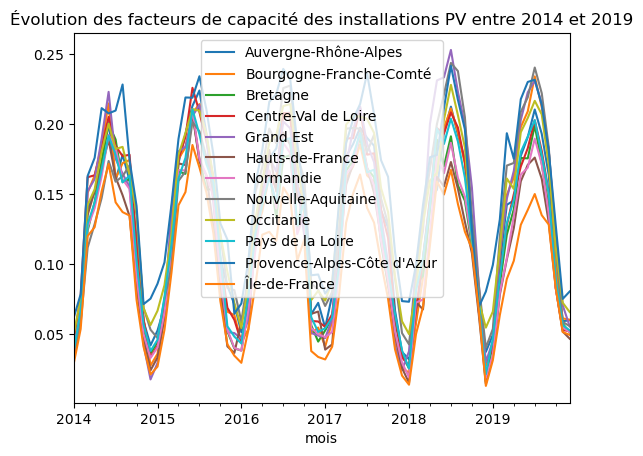

In [16]:
## Chemin vers le fichier CSV
import matplotlib. pyplot  as plt
filepath = "normalized_production_solaire_2014_2019.csv"
df_energy = pd.read_csv(filepath, index_col=0, header=0, parse_dates=True)
# Visualisation
plt.figure()
df_energy.plot(
    title="Évolution des facteurs de capacité des installations PV entre 2014 et 2019"
)
plt.show()

df_energy = df_energy.rename(columns={'Provence-Alpes-Côte d\'Azur': 'PACA'})
df_energy = df_energy.rename(columns={'Île-de-France': 'Ile-de-France'})
df_energy = df_energy.rename(columns={'Pays de la Loire': 'Pays-de-la-Loire'})

region_names = df_energy.columns.tolist()


### Exemple de la visualisation des facteurs de capacité pour la région : Auvergne-Rhône-Alpes (2014-2019)

Cette cellule  affiche un graphique temporel montrant l'évolution des facteurs de capacité sur la période 2014-2019. 

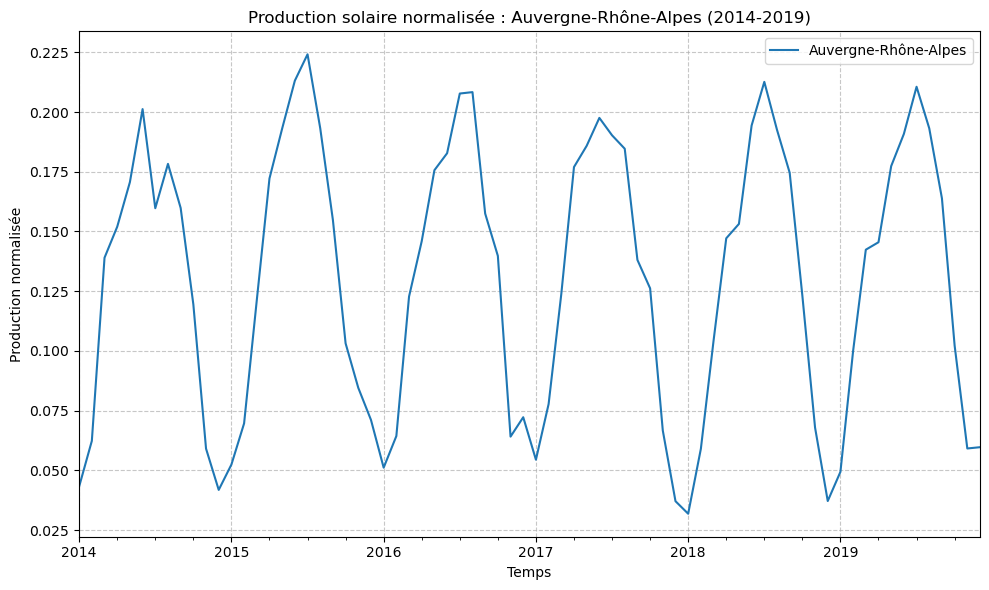

In [17]:


# Vérifiez que la région "Auvergne-Rhône-Alpes" est bien présente dans les colonnes
if 'Auvergne-Rhône-Alpes' in df_energy.columns:
    # Filtrage des données pour la région spécifique
    df_energy['Auvergne-Rhône-Alpes'].plot(
        figsize=(10, 6), 
        title="Production solaire normalisée : Auvergne-Rhône-Alpes (2014-2019)",
        xlabel="Temps",
        ylabel="Production normalisée",
        legend=True
    )
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("La région 'Auvergne-Rhône-Alpes' n'est pas présente dans les colonnes du DataFrame.")


## 📊 Etape 2 : Collecte des données climatiques 


Les données utilisées proviennent du site officiel de la NASA MERRA-2 :  
[https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)  

Cependant, l'accès à ces données nécessite des identifiants. Afin de simplifier leur utilisation et éviter une automatisation complexe de la connexion, les données ont été téléchargées manuellement et placées directement dans le dossier **data**.  

Voici le chemin d'accès défini dans le code :  
- **Répertoire des données climatiques :** `data`
- **Nom des fichiers :** `merra2_area_selection_output_{}_merra2_2010-2019.nc`

Les bibliothèques Python `xarray` et `matplotlib` sont utilisées pour manipuler et visualiser ces données.

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

data_dir_climate = "data"
filename_climate = 'merra2_area_selection_output_{}_merra2_2010-2019.nc'



### Regroupement par région
Nous avons ensuite cherché à avoir ces données région par région pour réaliser notre étude. Pour réaliser la correspondance entre les points de la grille (définis par leur longitude et latitude) et une région française, nous avons utilisé un masque. 


1. **Chargement du fichier masque :**
   - Le fichier masque, nommé `mask_datagouv_french_regions_merra2_Nx_France.nc`, est chargé depuis le répertoire défini (`data`) à l'aide de la bibliothèque `xarray`.
   - Ce fichier contient une variable nommée `mask`, qui associe chaque point de la grille MERRA-2 à une région spécifique de France.

2. **Visualisation :**
   - Un graphique est généré pour représenter les points de la grille (définis par leur longitude et latitude) et leur association à une région, grâce à une échelle de couleurs (`cmap='Set1'`).
   - Le titre "Grid Point-Region Mask with Colors" identifie clairement la visualisation.



Text(0.5, 1.0, 'Grid Point-Region Mask with Colors')

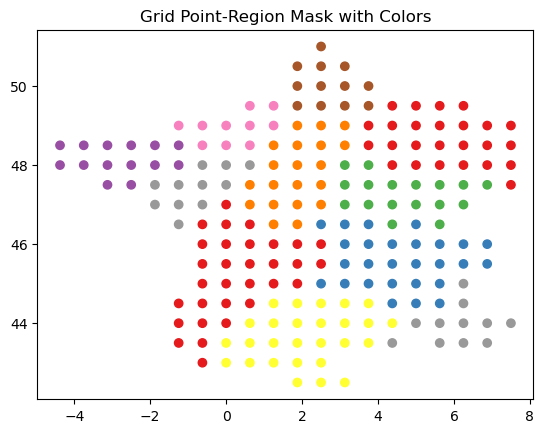

In [19]:

filename_mask = "mask_datagouv_french_regions_merra2_Nx_France.nc"

filepath_mask = Path(data_dir_climate, filename_mask)
 # Read and plot grid point-region mask

ds_mask = xr.load_dataset(filepath_mask, engine='netcdf4')
da_mask = ds_mask['mask']
plt.figure()
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_mask, cmap='Set1')
plt.title('Grid Point-Region Mask with Colors')



### Visualisation des données climatiques
#### Exemple pour le Vent zonal moyen en France

Ce code charge les données climatiques du **vent zonal** (`zonal_wind`), calcule sa moyenne sur toute la période, et affiche une carte de la France. Chaque point représente un point de grille (longitude, latitude), avec une échelle de couleurs indiquant l'intensité moyenne du vent.

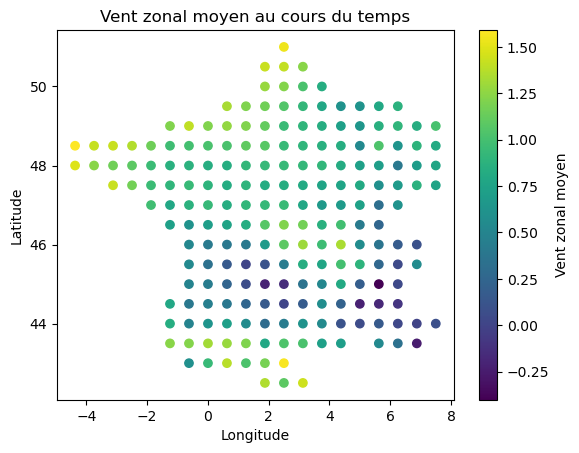

In [20]:
# Lire une variable climatique et tracer sa moyenne au cours du temps
variable_name = 'zonal_wind'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_climate = xr.load_dataset(filepath)[variable_name]
plt.figure()
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
plt.title("Vent zonal moyen au cours du temps")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Vent zonal moyen")
plt.show()

### Combinaison et traitement des données climatiques

Cette étape vise à combiner les données climatiques disponibles dans le dossier **data**, en calculant leur moyenne régionale à l'aide du masque géographique. 

#### Méthodologie :
1. **📥 Chargement des données :**
   - Pour chaque variable (par ex. température, vent, humidité), le fichier correspondant est chargé si disponible.
   
2. **📊 Agrégation régionale :**
   - Les données sont regroupées par région grâce au masque (`da_mask`) et la moyenne est calculée pour chaque région.

3. **🔗 Fusion des ensembles de données :**
   - Les moyennes régionales de toutes les variables sont combinées dans un seul ensemble de données.

4. **📋 Conversion au format DataFrame :**
   - Les données agrégées sont converties en un tableau pandas (`DataFrame`) pour faciliter les analyses ultérieures.



In [21]:
 #combiner toutes les datas du dossier climat
import os
# Liste des noms de variables (ou parties variables du nom de fichier)
variable_names = ['height_500','meridional_wind', 'surface_density','surface_downward_radiation','surface_specific_humidity','surface_temperature','upper_meridional_wind','upper_zonal_wind','zonal_wind']

processed_datasets = []

for variable_name in variable_names:
    filename = filename_climate.format(variable_name)
    filepath = Path(data_dir_climate, filename)

    if os.path.exists(filepath):  # Vérifiez si le fichier existe
        da_climate = xr.load_dataset(filepath)

        # Calculez la moyenne régionale
        da_climate_reg = da_climate.groupby(da_mask).mean().rename(mask='region')
        da_climate_reg['region'] = ds_mask['region'].values

        # Ajoutez le résultat à la liste des ensembles de données traitées
        processed_datasets.append(da_climate_reg)
    else:
        print(f"Le fichier pour {variable_name} n'existe pas : {filepath}")

# Fusionnez tous les ensembles de données traités
combined_data = xr.merge(processed_datasets)
pre_climate = combined_data.to_dataframe()

## Etape 3 : Traitement final des données climatiques et énergétiques

À ce stade, nous disposons de données climatiques horaires et de données mensuelles pour les capacity factors. Afin de simplifier le travail de prédiction ultérieur, nous avons calculé la moyenne mensuelle des données climatiques, permettant ainsi de travailler sur une base mensuelle plutôt qu’horaire. Enfin, avant de procéder aux prédictions, nous avons tout d'abord normaliser et retirer la saisonnalité pour nos données climatiques et énergétiques. 

### Pourquoi normaliser et retirer la saisonnalité ?

- **Normalisation**  
  Permet de mettre toutes les variables sur la même échelle (moyenne 0, écart type 1).Cela facilite l’apprentissage et la convergence lors de l’utilisation de méthodes de régression pénalisée (Ridge, Lasso),et rend les coefficients plus comparables entre les différentes variables.

- **Suppression de la saisonnalité**  
  Retirer la composante saisonnière (moyennes mensuelles) aide à se concentrer sur les variations et anomalies réelles plutôt que sur les fluctuations annuelles récurrentes. Cela évite que le modèle n’apprenne uniquement les patterns cycliques mensuels et améliore souvent la qualité de la prédiction lorsque l’on veut capturer des phénomènes plus fins.


### Présentation du programe  
Ce programme vise à traiter et analyser les données climatiques et énergétiques pour chaque région, en enlevant les effets de saisonnalité. Le processus est répété pour toutes les régions, et les résultats sont sauvegardés dans des dictionnaires.

#### Étapes principales :

1. **Création des structures de données :**
   - Trois dictionnaires sont initialisés pour stocker séparément les données combinées, les données énergétiques, et les données climatiques pour chaque région.

2. **Filtrage des données par région :**
   - Les données climatiques (`pre_climate`) sont filtrées pour la région actuelle, et leur index est ajusté.
   - Les données énergétiques correspondantes pour la même région sont également sélectionnées.

3. **Synchronisation des données climatiques et énergétiques :**
   - Un DataFrame pour les données climatiques est créé avec les mêmes indices que les données énergétiques (mois).
   - Pour chaque mois, la moyenne mensuelle des données climatiques est calculée pour les indices correspondants.

4. **Normalisation des données :**
   - Les données climatiques et énergétiques sont normalisées pour faciliter la comparaison. 
     
5. **Visualisation des données avant suppression de la saisonnalité :**
   - Les données climatiques et énergétiques normalisées sont visualisées pour détecter d'éventuelles tendances saisonnières.

6. **Suppression de la saisonnalité :**
   - Les moyennes mensuelles sont calculées pour chaque mois de l'année (par exemple, janvier, février, etc.) pour les données climatiques et énergétiques.
   - Ces moyennes sont ensuite soustraites des données originales pour chaque date afin de supprimer les effets de la saisonnalité.

7. **Visualisation après suppression de la saisonnalité :**
   - Les données ajustées sont tracées pour vérifier que la saisonnalité a bien été supprimée.

8. **Stockage des résultats :**
   - Les données climatiques et énergétiques ajustées sont sauvegardées dans des dictionnaires pour chaque région.
   - Les données climatiques et énergétiques sont combinées dans un unique DataFrame, également stocké.



/opt/conda/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


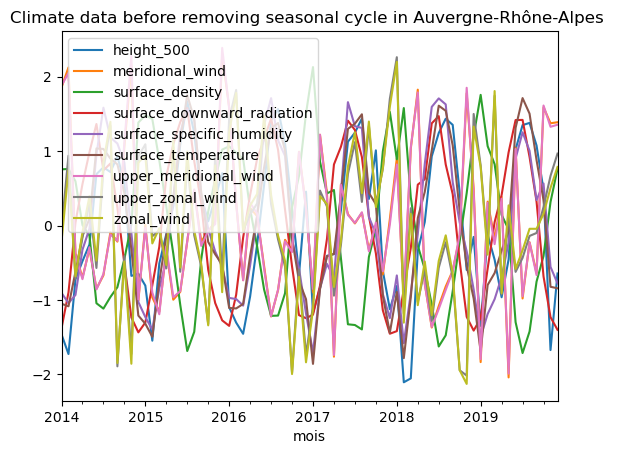

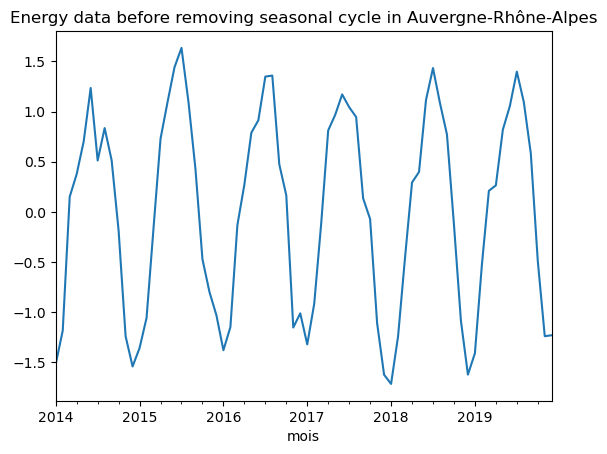

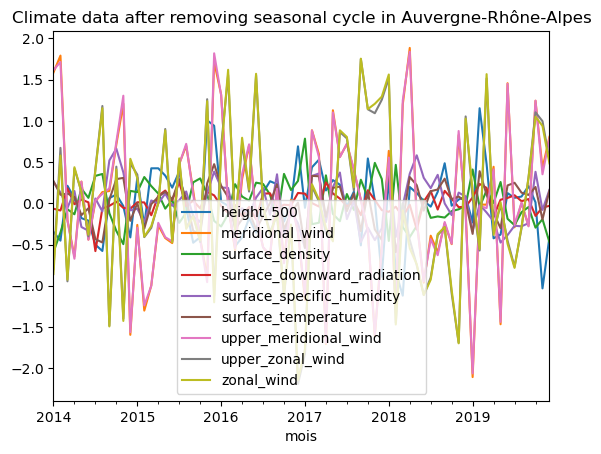

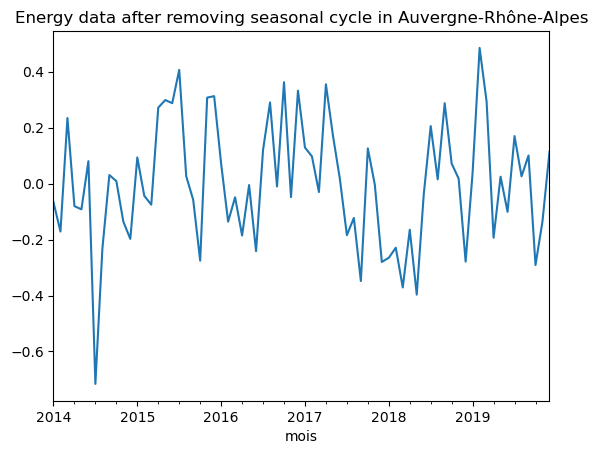

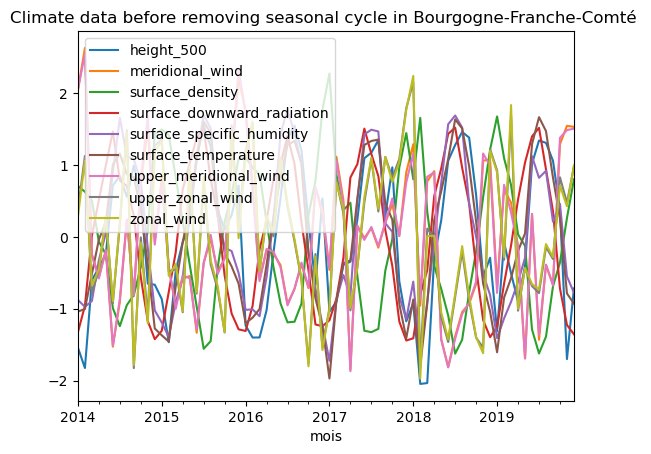

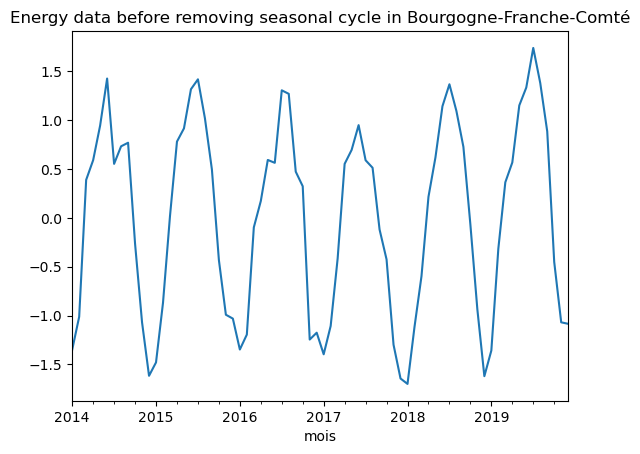

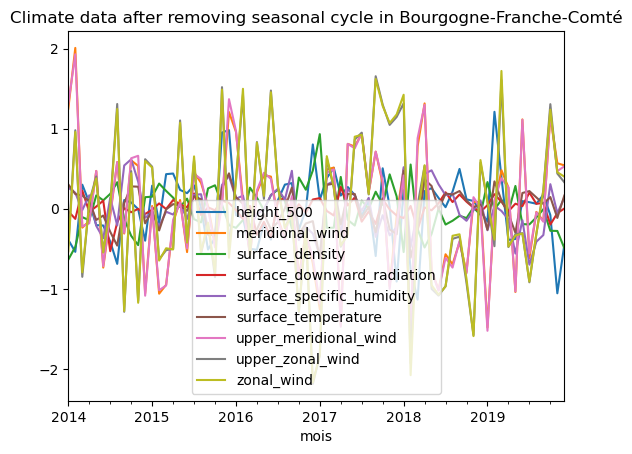

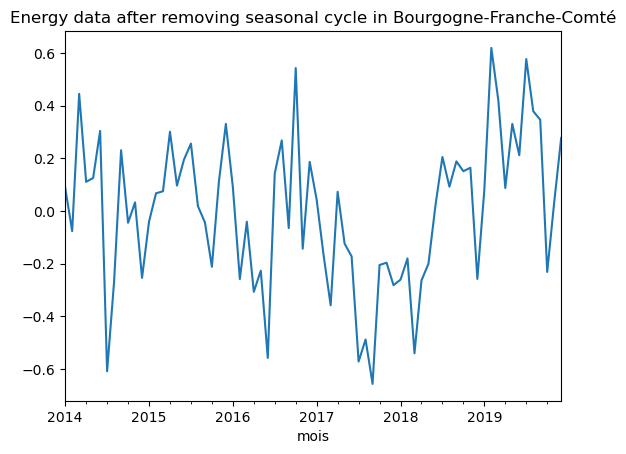

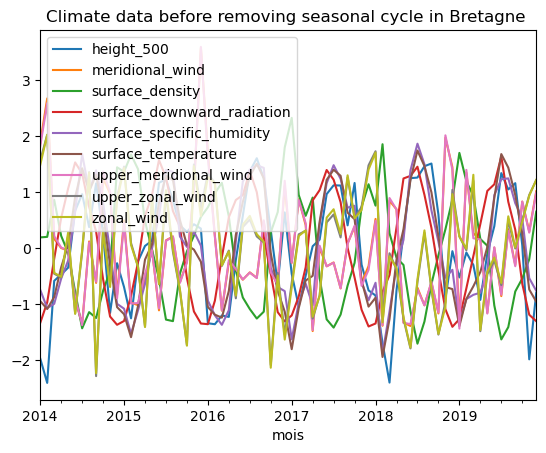

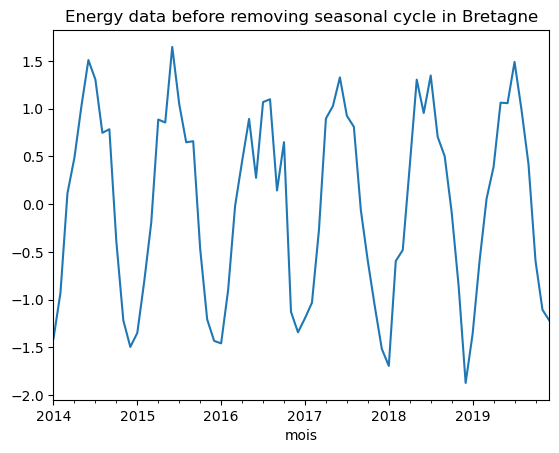

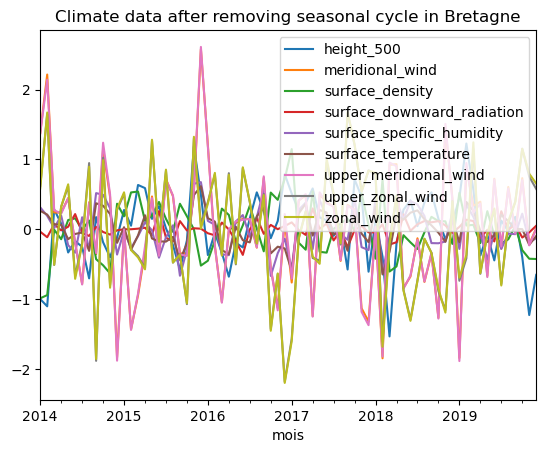

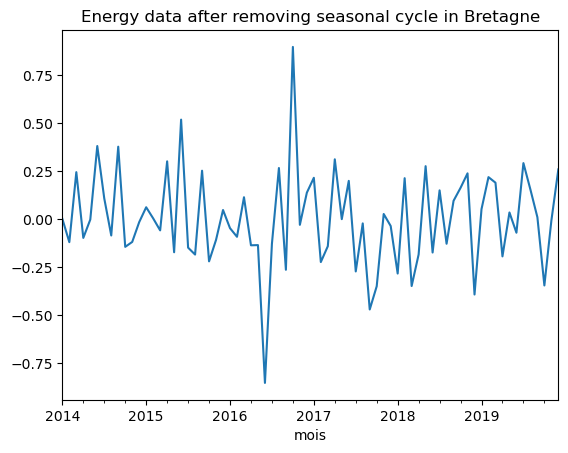

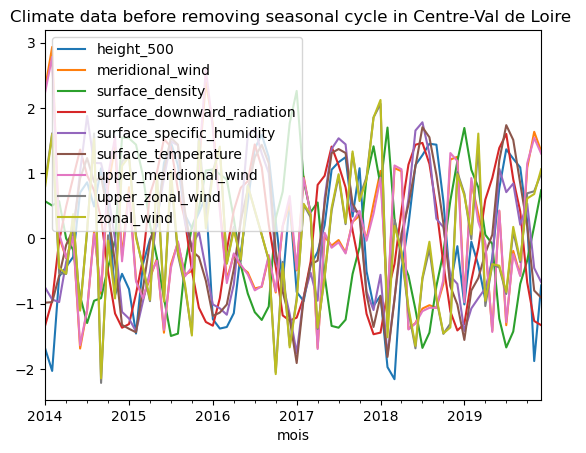

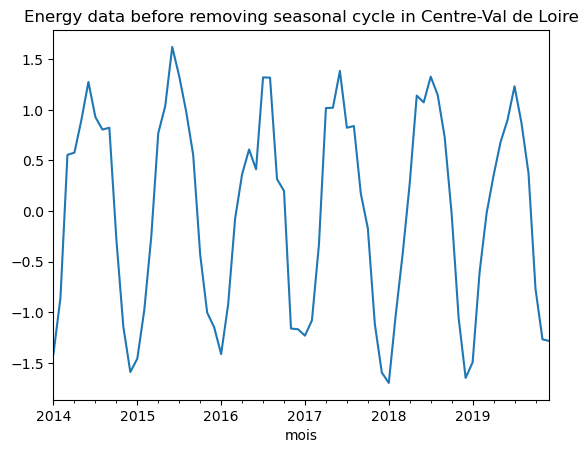

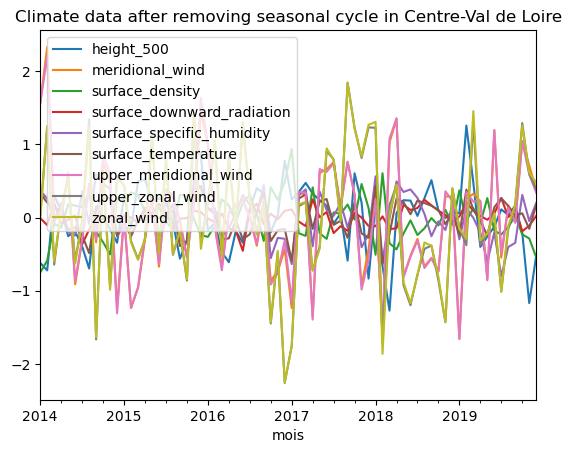

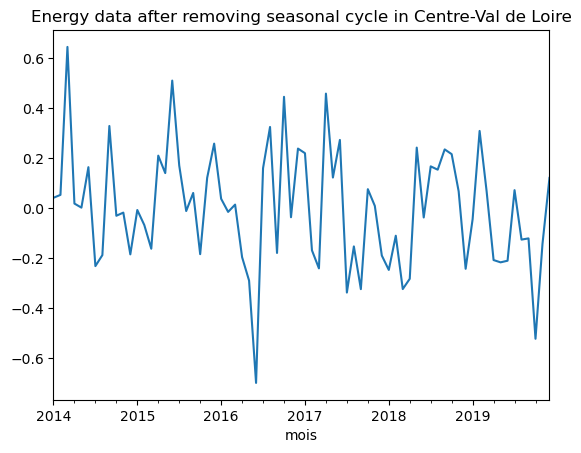

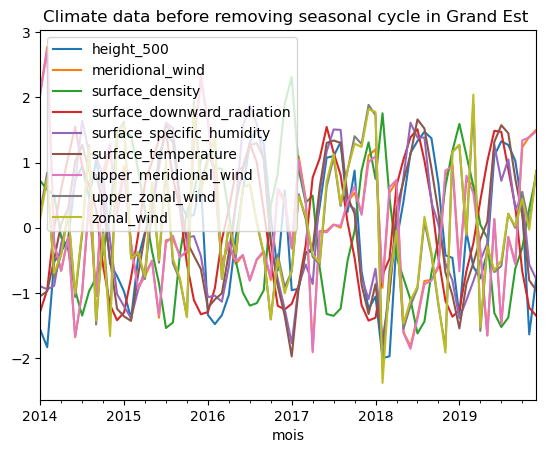

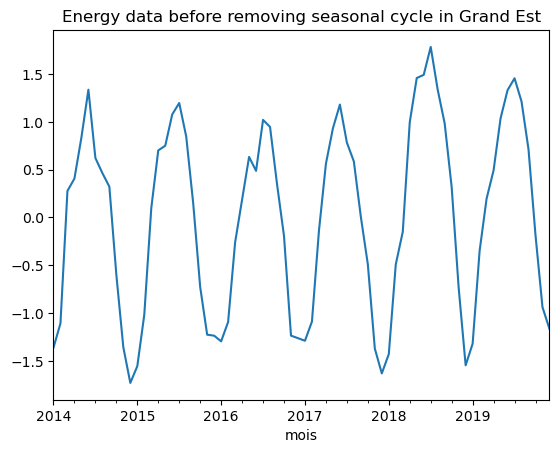

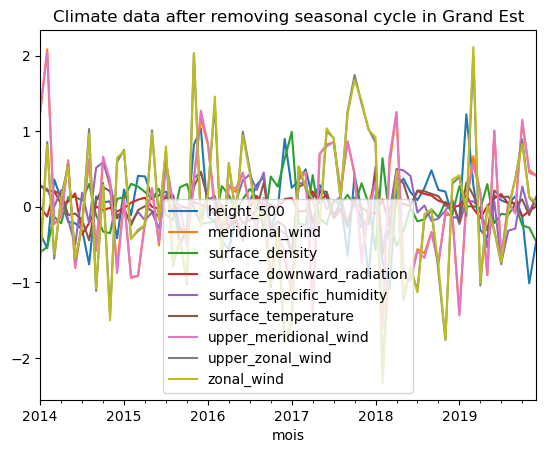

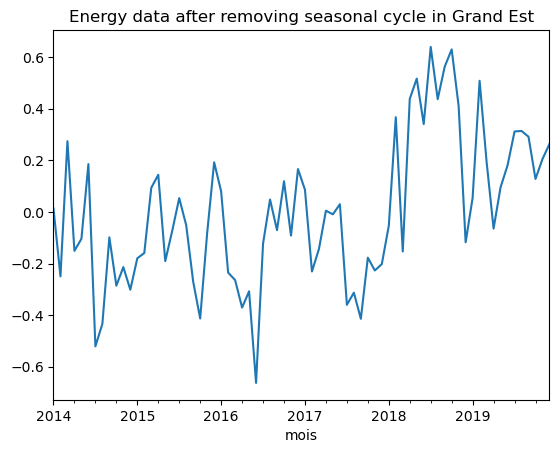

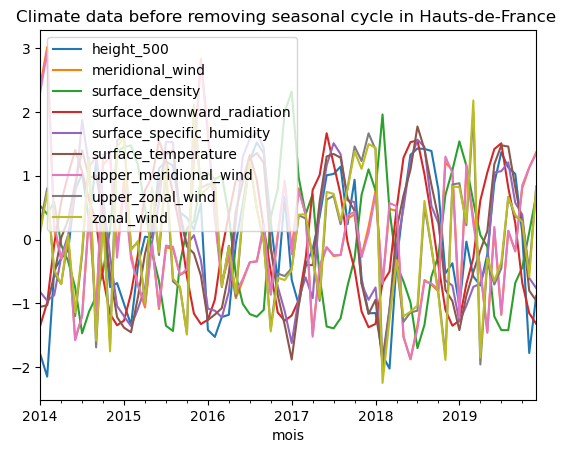

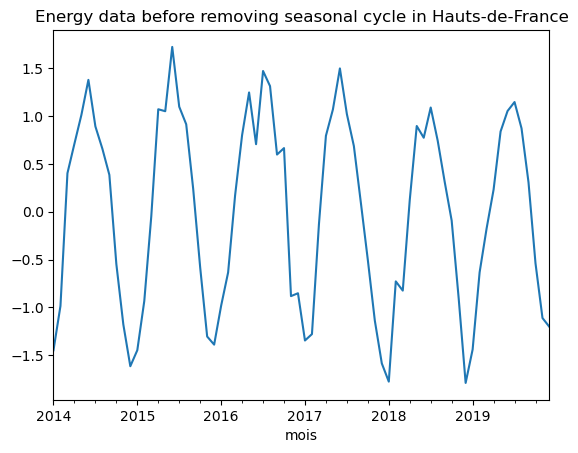

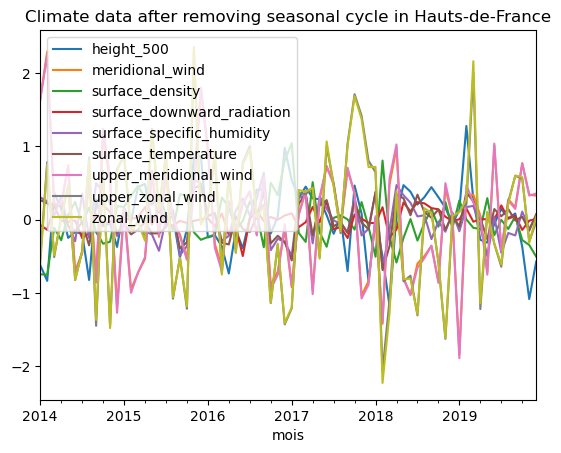

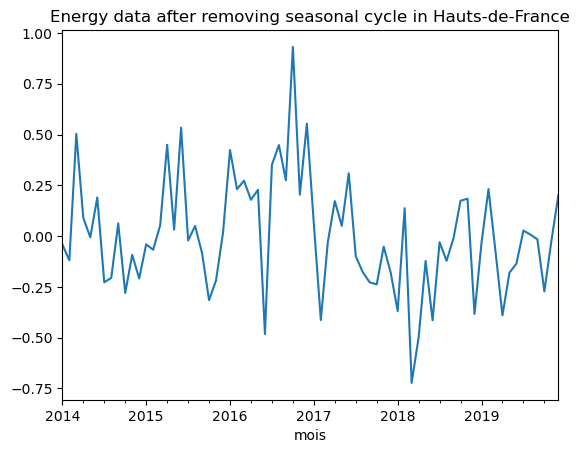

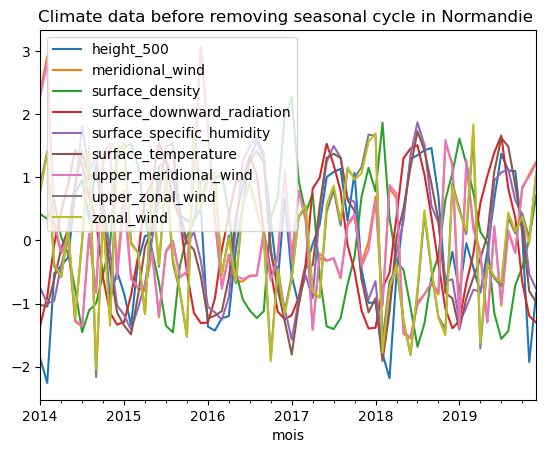

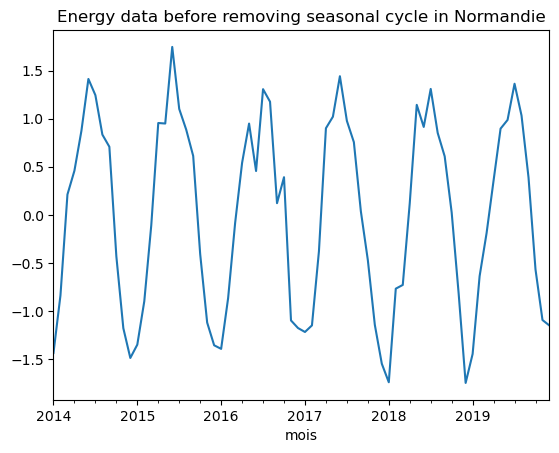

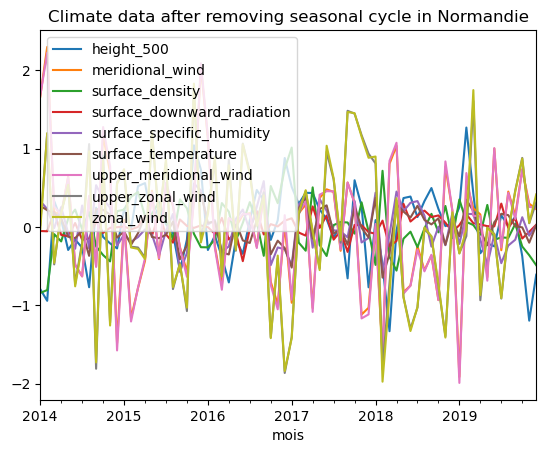

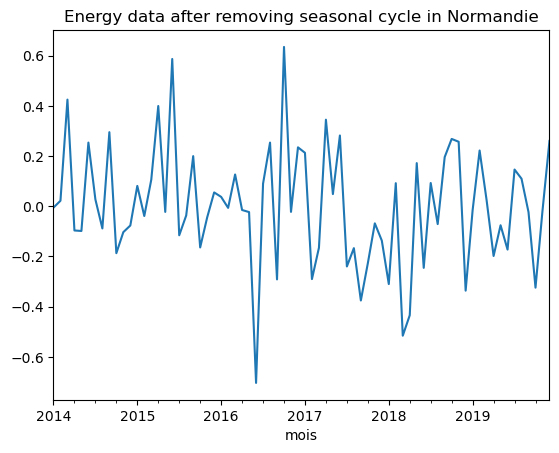

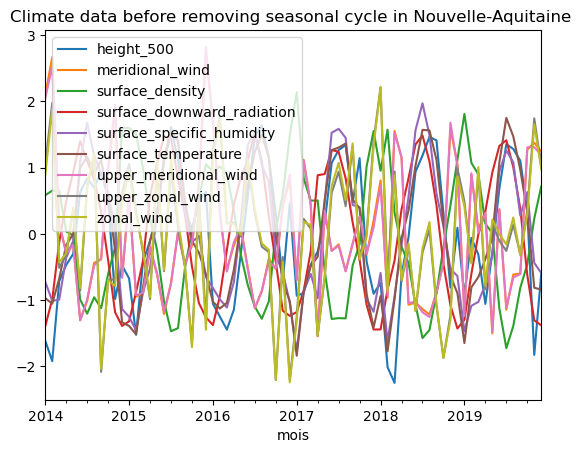

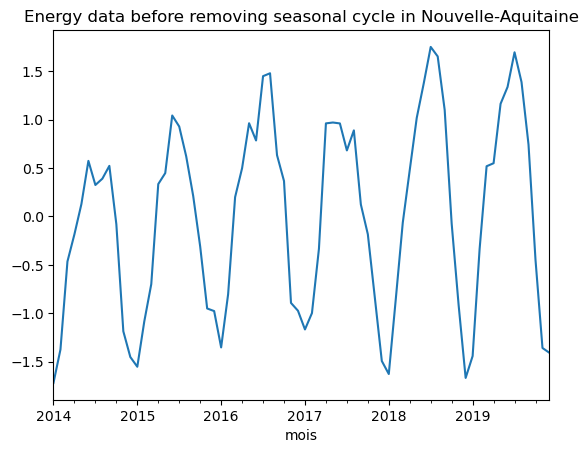

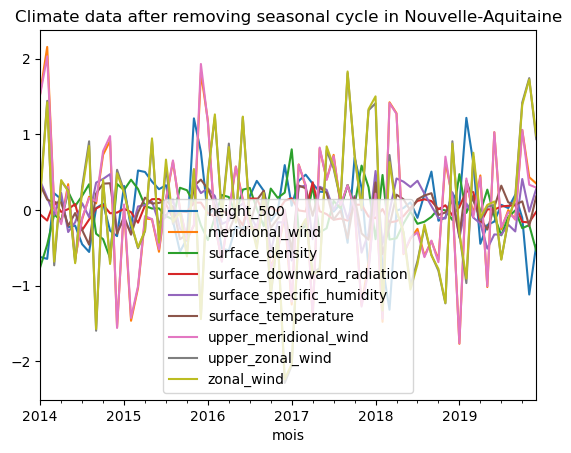

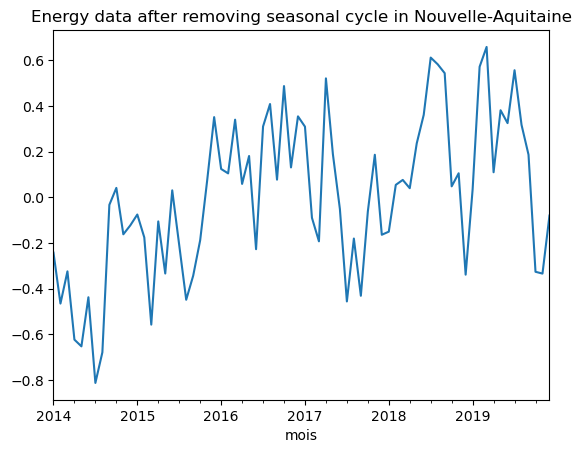

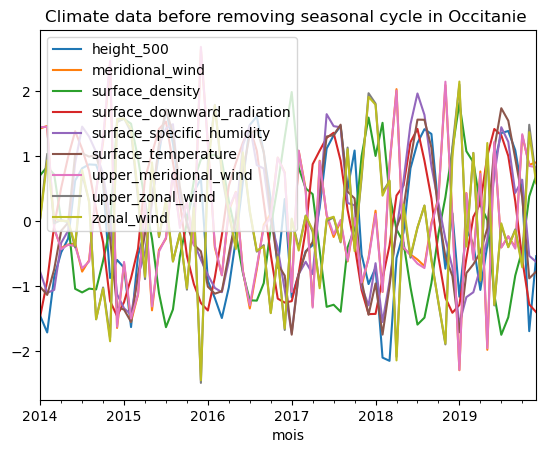

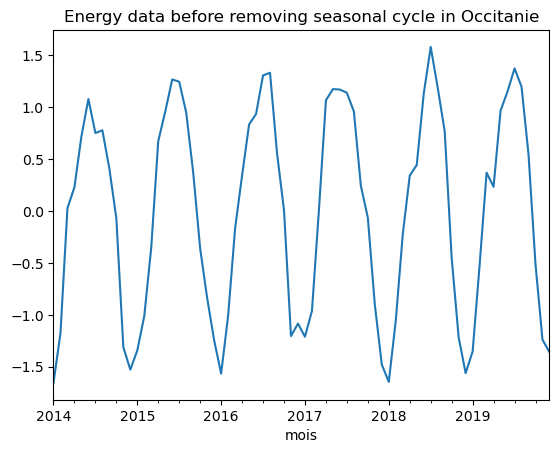

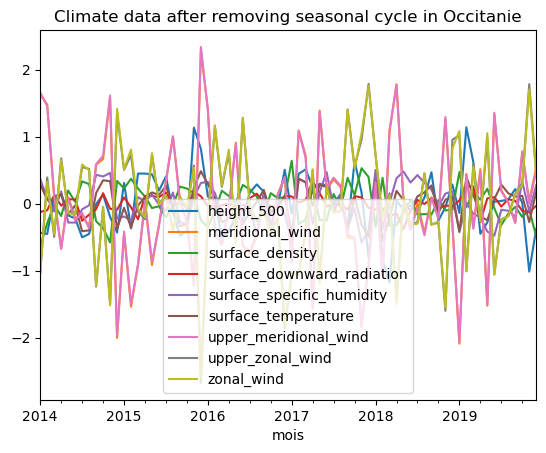

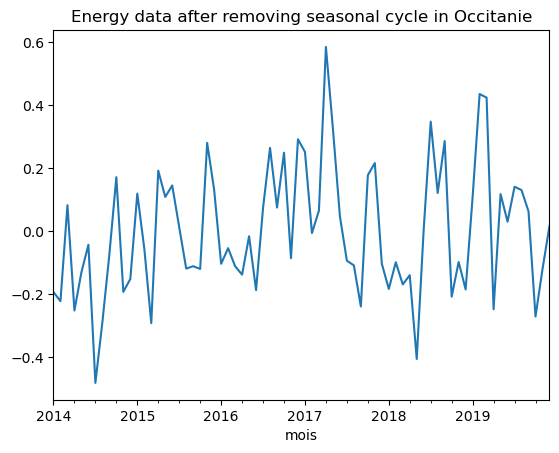

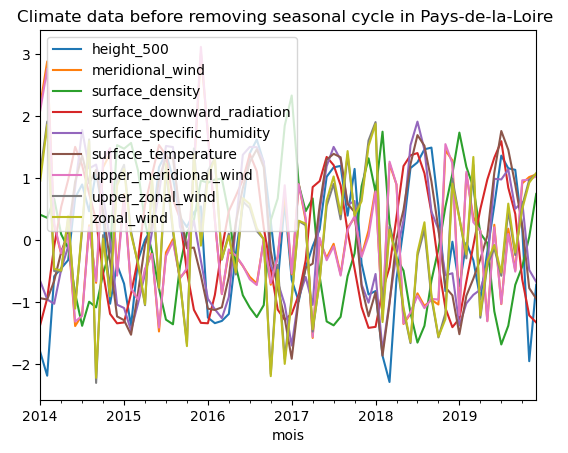

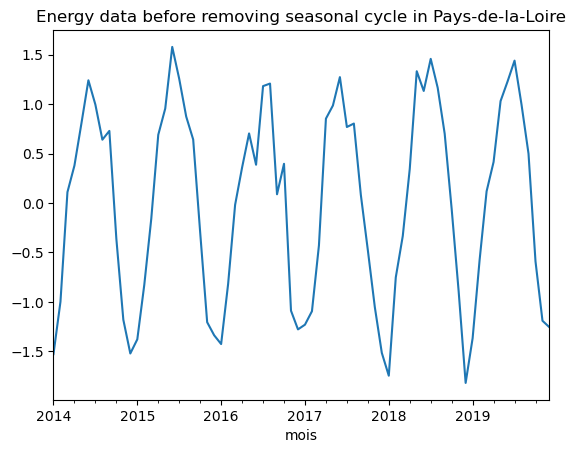

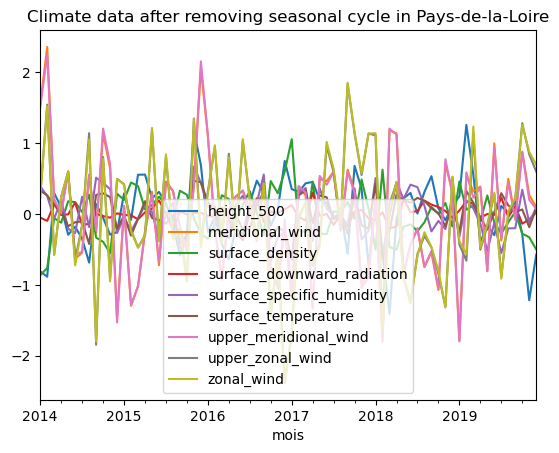

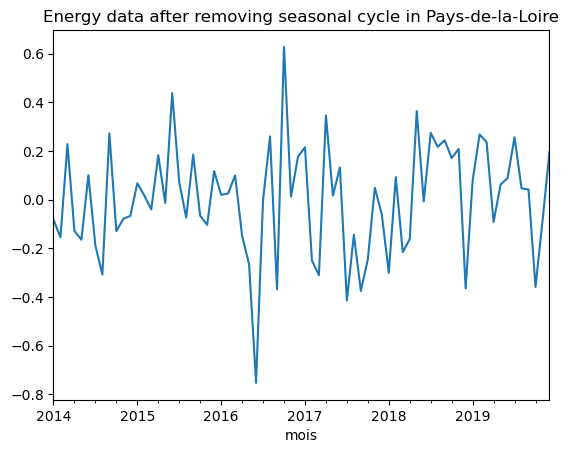

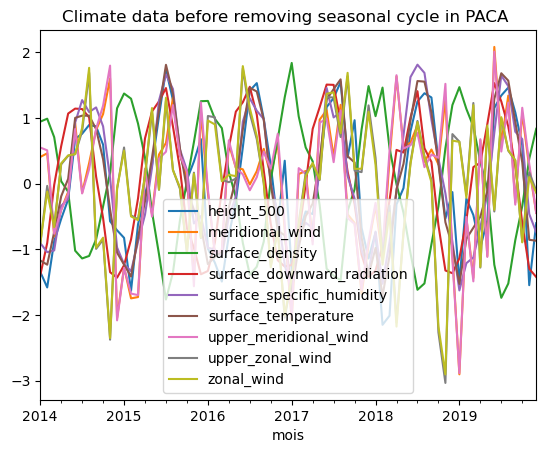

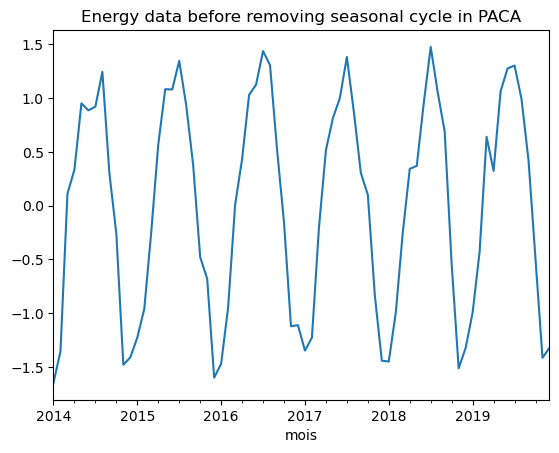

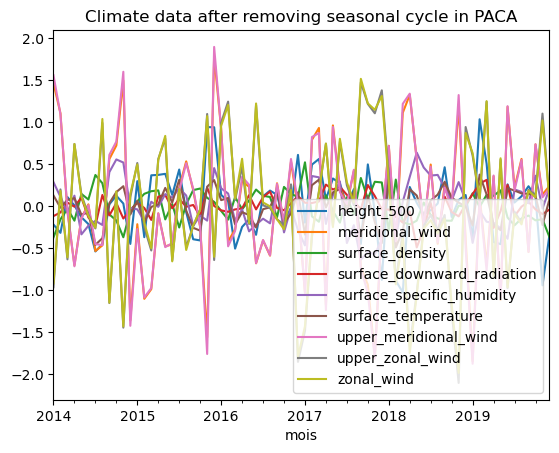

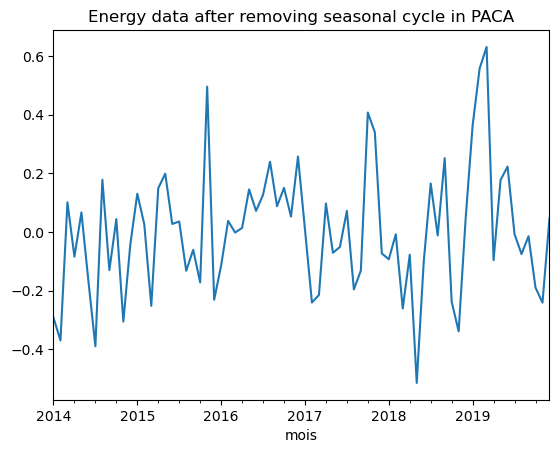

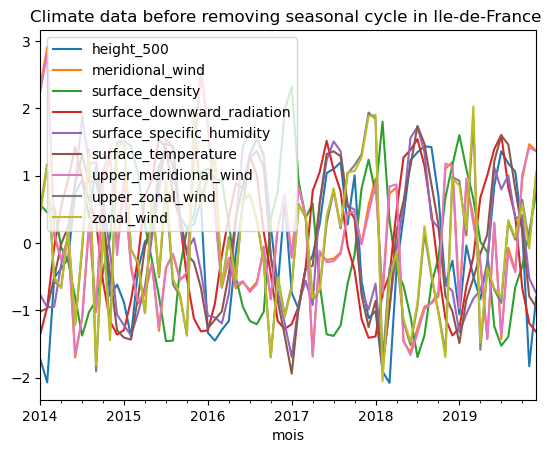

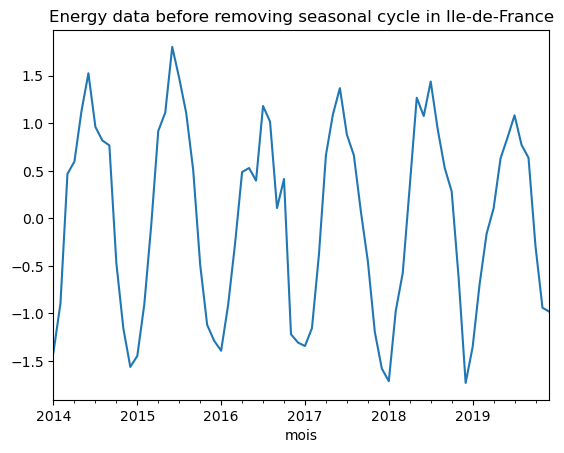

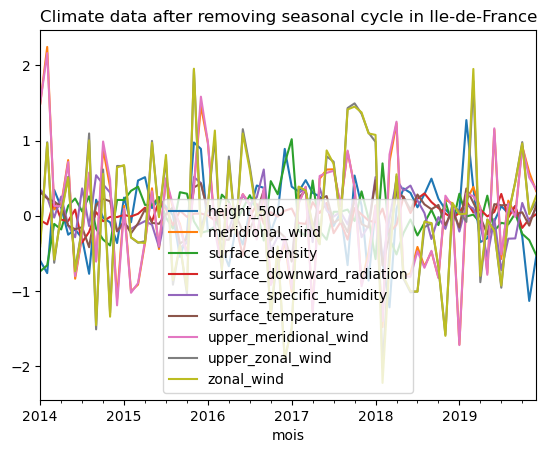

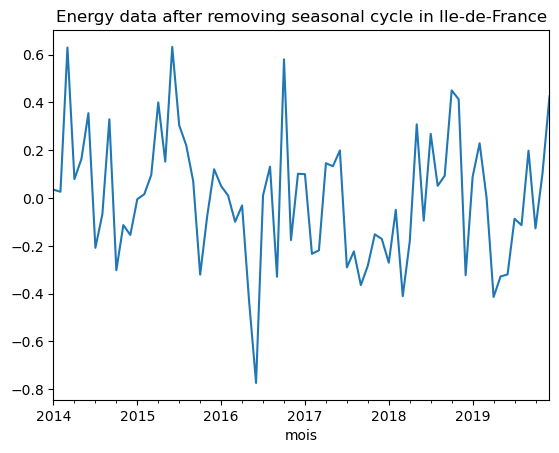

In [26]:
import math
import numpy as np

#création de trois dictionnaires qui contiendront les données pour chaque région 
combined_dataframes = {}
energy_data = {}
climate_data={}

for region in region_names:


    # Filtrer 'pre_climate' pour obtenir les données de 'REGION_NAME' uniquement.
    cnd = pre_climate.index.get_level_values("region") == region
    climate_proj = pre_climate[cnd]
    climate_proj.index = climate_proj.index.droplevel("region")

    # Sélectionner les données énergétiques pour la même région.
    energy= df_energy[region]


    # Création d'un nouveau DataFrame 'climate' avec les mêmes indices que 'energy' (mois) 
    # et les mêmes colonnes que 'climate_proj', initialisé avec des valeurs NaN.
    climate = pd.DataFrame(index=energy.index, columns=climate_proj.columns, dtype=np.float64)

    # Calcul de la moyenne mensuelle des données climatiques pour chaque date dans 'climate'.
    for date in climate.index:
        climate.loc[date] = climate_proj[(climate_proj.index.get_level_values("time") >= date) & (climate_proj.index.get_level_values("time") < date + pd.Timedelta(days=30))].mean()

    # Normaliser les données climatiques et énergétiques. 
    climate = (climate - climate.mean()) / climate.std()
    energy = (energy - energy.mean()) / energy.std()
    climate.plot()
    plt.title(f'Climate data before removing seasonal cycle in {region} ')
    plt.figure()
    energy.plot()
    plt.title(f'Energy data before removing seasonal cycle in {region}')

    #enlever la saisonalité par région
    # Calcul des moyennes mensuelles pour chaque mois pour les données climatiques et énergétiques.
    avgs_climate = {}
    avgs_energy = {}
    for month in range(1, 13):
        avgs_climate[month] = climate[climate.index.get_level_values("mois").month == month].mean()
        avgs_energy[month] = energy[energy.index.get_level_values("mois").month == month].mean()
    
    # Soustraction des moyennes mensuelles des données originales pour chaque date.
    for date in energy.index:
        climate.loc[date] -= avgs_climate[date.month]
        energy.loc[date] -= avgs_energy[date.month]
    climate.plot()    
    plt.title(f'Climate data after removing seasonal cycle in {region}')
    plt.figure()
    energy.plot()
    plt.title(f'Energy data after removing seasonal cycle in {region}')
    #ajout en mémoire dans les dictionnaires
    energy_data[f"energy_{region}"] = energy
    climate_data[f"climate_{region}"] = climate
    
  # Concaténation des données climatiques et énergétiques en un seul DataFrame
    combined = pd.concat([climate, energy], axis=1)
    
    # Stockage du DataFrame dans le dictionnaire avec un nom clé dynamique
    combined_dataframes[f"combined_{region}"] = combined
    



In [23]:
# Par exemple, pour accéder au DataFrame de la Bretagne 
combined_region1 = combined_dataframes["combined_Bretagne"]
combined_region1.describe()

height_500  meridional_wind  surface_density  \
count  7.200000e+01     7.200000e+01     7.200000e+01   
mean   2.467162e-17    -1.233581e-17     1.233581e-17   
std    5.060146e-01     8.630644e-01     3.841257e-01   
min   -1.531975e+00    -1.844869e+00    -9.868284e-01   
25%   -2.770593e-01    -4.776723e-01    -2.267403e-01   
50%    4.873415e-02     5.710567e-02     8.749739e-03   
75%    2.959809e-01     4.707020e-01     1.882441e-01   
max    1.227106e+00     2.576050e+00     1.147151e+00   

       surface_downward_radiation  surface_specific_humidity  \
count                7.200000e+01               7.200000e+01   
mean                -5.088522e-17               1.233581e-17   
std                  1.188278e-01               3.193381e-01   
min                 -3.657399e-01              -6.668811e-01   
25%                 -5.841169e-02              -2.583841e-01   
50%                 -1.935136e-03              -3.455359e-02   
75%                  6.893022e-02               2.090487e-01   
max                  2.988438e-01               6.753567e-01   

       surface_temperature  upper_meridional_wind  upper_zonal_wind  \
count         7.200000e+01              72.000000         72.000000   
mean          2.775558e-17               0.000000          0.000000   
std           2.530447e-01               0.869011          0.844973   
min          -6.454960e-01              -1.884220         -2.178628   
25%          -1.814296e-01              -0.471032         -0.519829   
50%          -2.487619e-02               0.076923         -0.100495   
75%           2.088102e-01               0.487665          0.617631   
max           6.168538e-01               2.609080          1.667280   

         zonal_wind      Bretagne  
count  7.200000e+01  7.200000e+01  
mean  -6.167906e-18 -3.083953e-18  
std    8.556308e-01  2.528975e-01  
min   -2.197068e+00 -8.527084e-01  
25%   -5.233236e-01 -1.419226e-01  
50%   -1.006772e-01 -1.202979e-02  
75%    6.463058e-01  1.695572e-01  
max    1.678085e+00  8.963736e-01

# II. Analyse Descriptive et Représentation Graphique
### Etude de la corrélation entre les variables pour une région donnée

L’objectif de ce code est de calculer et visualiser la matrice de corrélation entre les variables climatiques et énergétiques pour la région de Bretagne. Après avoir construit la clé d’accès au DataFrame combiné, on utilise la méthode de corrélation de Pearson pour déterminer la force de la relation entre chaque paire de variables. Les résultats sont ensuite affichés sous forme de heatmap, où la carte colorée met en évidence les fortes ou faibles corrélations, permettant ainsi d’identifier rapidement les liens les plus significatifs entre les données climatiques et la production énergétique.


<Figure size 1200x800 with 0 Axes>

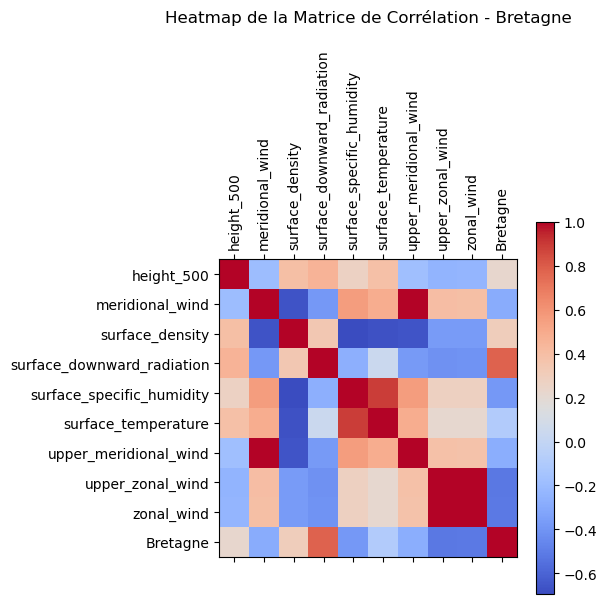

In [33]:
import matplotlib.pyplot as plt

# Construction du nom de clé pour accéder au DataFrame combiné
REGION_NAME = 'Bretagne'
combined_key = f"combined_{REGION_NAME}"

# Calcul de la matrice de corrélation entre les variables climatiques et énergétiques.
correlation_matrix = combined_dataframes[combined_key].corr(method='pearson')

# Affichage de la matrice de corrélation sous forme de carte thermique (heatmap).
plt.figure(figsize=(12, 8))  # Crée une nouvelle figure avec des dimensions spécifiques
plt.matshow(correlation_matrix, cmap='coolwarm')  # Palette de couleurs
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)  # Noms des colonnes en abscisse
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)  # Noms des colonnes en ordonnée
plt.colorbar()
plt.title(f"Heatmap de la Matrice de Corrélation - {REGION_NAME}", pad=20)  # Titre ajusté avec un espace
plt.show()


On a ensuite cherché à identifier précisément quelles variables influencent le plus fortement le **capacity factor** dans la région Bretagne. Pour ce faire, nous avons extrait la colonne de la matrice de corrélation correspondant à la production énergétique de cette région, puis trié les valeurs absolues de ces corrélations. Cette approche nous permet de repérer immédiatement les variables climatiques qui exercent l’impact le plus marqué, qu’il soit positif ou négatif, sur la production. En affichant ces corrélations, nous mettons en évidence les facteurs déterminants à prendre en compte pour mieux comprendre la variabilité du **capacity factor** en Bretagne.

In [34]:
# Calculating correlations with 'energy'
energy_correlations = correlation_matrix[REGION_NAME]

# Using absolute values to consider both strong positive and strong negative correlations
energy_correlations_abs = energy_correlations.abs().sort_values(ascending=False)

# Display the correlation values
print(f'Les variables les plus corrélées avec les capacity factors dans la région {REGION_NAME} sont: ')
print(energy_correlations_abs[1:])


Les variables les plus corrélées avec les capacity factors dans la région Bretagne sont: 
surface_downward_radiation    0.776150
upper_zonal_wind              0.517262
zonal_wind                    0.512733
surface_specific_humidity     0.378778
surface_density               0.299260
meridional_wind               0.285184
upper_meridional_wind         0.277296
height_500                    0.221354
surface_temperature           0.085886
Name: Bretagne, dtype: float64


### Etude de la corrélation pour toutes les régions

Ce code généralise l'analyse de corrélation à l'ensemble des régions. Pour chacune d'elles, il calcule la matrice de corrélation, isole la partie relative au **capacity factor**, puis identifie les cinq variables climatiques dont l’influence (positive ou négative) est la plus marquée. Cette approche permet de repérer rapidement, pour chaque région, les facteurs clés susceptibles d’affecter la production énergétique.

In [35]:

top_correlations_per_region = {}

for region in region_names:
    combined_key = f"combined_{region}"

    if combined_key in combined_dataframes:
        # Calculer la matrice de corrélation
        correlation_matrix = combined_dataframes[combined_key].corr()

        # Obtenir les cinq variables les plus corrélées (en valeur absolue) pour la région
        
        top_vars = correlation_matrix[region].abs().sort_values(ascending=False)[1:6]
        top_correlations_per_region[region] = top_vars
    else:
        print(f"La région {region} n'est pas présente dans les données combinées.")

# Afficher les résultats
for region, correlations in top_correlations_per_region.items():
    print(f"Région {region} - Top 5 variables corrélées :")
    print(correlations)
    print()  

Région Auvergne-Rhône-Alpes - Top 5 variables corrélées :
surface_downward_radiation    0.864843
height_500                    0.641391
surface_temperature           0.373089
upper_zonal_wind              0.292005
zonal_wind                    0.284828
Name: Auvergne-Rhône-Alpes, dtype: float64

Région Bourgogne-Franche-Comté - Top 5 variables corrélées :
surface_downward_radiation    0.744298
upper_zonal_wind              0.449397
zonal_wind                    0.435217
height_500                    0.415541
surface_temperature           0.261358
Name: Bourgogne-Franche-Comté, dtype: float64

Région Bretagne - Top 5 variables corrélées :
surface_downward_radiation    0.776150
upper_zonal_wind              0.517262
zonal_wind                    0.512733
surface_specific_humidity     0.378778
surface_density               0.299260
Name: Bretagne, dtype: float64

Région Centre-Val de Loire - Top 5 variables corrélées :
surface_downward_radiation    0.801977
height_500                    0

#### Variables avec la plus forte corrélation en moyenne sur toutes les régions 


In [36]:
# Variables avec la plus haute corrélation moyenne à travers toutes les régions
top_correlations = pd.Series(dtype=float)

for region in region_names:
    combined_key = f"combined_{region}"

    if combined_key in combined_dataframes:
        # Calculer la matrice de corrélation pour la région spécifique
        correlation_matrix = combined_dataframes[combined_key].corr()

        # On obtient les corrélations absolues par rapport à la variable cible pour la région, en excluant l'autocorrélation
        region_correlations = correlation_matrix[region].abs().drop(region)

        # Mettre à jour la série des corrélations en conservant la moyenne des corrélations pour chaque variable
        top_correlations = pd.concat([top_correlations, region_correlations], axis=1).mean(axis=1)

# Trier les résultats pour obtenir les plus hautes corrélations moyennes
top_correlations = top_correlations.sort_values(ascending=False)

# Afficher les variables avec la plus haute corrélation moyenne à travers toutes les régions
print("Variables avec la plus haute corrélation moyenne à travers toutes les régions :")
print(top_correlations.head(5))

Variables avec la plus haute corrélation moyenne à travers toutes les régions :
surface_downward_radiation    0.675575
upper_zonal_wind              0.367857
zonal_wind                    0.359182
height_500                    0.315287
upper_meridional_wind         0.305468
dtype: float64


# III. Modélisation 

Dans cette section, nous avons évalué différents modèles de régression (Ridge et Lasso) pour prédire les facteurs de capacité à partir des données climatiques. Nous avons également mis en place une validation croisée emboîtée (nested cross-validation) afin de sélectionner l’hyperparamètre de régularisation de manière plus fiable et de mieux estimer la performance réelle de ces modèles. Nous avons également testé l’algorithme des k plus proches voisins (k-NN) afin de mesurer sa capacité à prédire les facteurs de capacité en fonction des données climatiques.

### Choix de la région et définition des X_train, X_test, y_train, y_test

Nous avons choisi pour la suite la région **Centre-Val de Loire** comme zone d’étude. Nous gardons les cinq variables climatiques considérées comme les plus corrélées à la production énergétique (*capacity factor*), d'après la partie précédente :  
- `surface_downward_radiation`,  
- `upper_zonal_wind`,  
- `zonal_wind`,  
- `height_500`,  
- `upper_meridional_wind`.

Nous construisons la matrice des prédicteurs `X` en sélectionnant uniquement ces cinq variables dans le jeu de données climatiques `climate_data` pour la région choisie. La variable cible `y` correspond à la série des *capacity factors* issue de `energy_data` pour la même région.

Enfin, nous utilisons la fonction `train_test_split` pour diviser l’ensemble de données (`X`, `y`) en deux sous-ensembles :  
- un jeu d’entraînement (*training set*, `X_train`, `y_train`), sur lequel le modèle ajustera ses paramètres,  
- un jeu de test (*test set*, `X_test`, `y_test`), qui servira ensuite à évaluer les performances du modèle sur des données inédites, avec ici un ratio de 80% pour l’entraînement et 20% pour le test.  

En procédant ainsi, on se concentre sur les variables les plus informatives et on teste la capacité du modèle à généraliser ses prédictions.

In [37]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#choix de la région d'étude
region_name = "Centre-Val de Loire"
X = climate_data[f"climate_{region_name}"].values
y = energy_data[f"energy_{region_name}"].values

# Liste des variables à corréler 
top_cols = [
    "surface_downward_radiation",
    "upper_zonal_wind",
    "zonal_wind",
    "height_500",
    "upper_meridional_wind"
]

# Sélection des colonnes dans le DataFrame "climate_data" pour la région choisie
X = climate_data[f"climate_{region_name}"][top_cols].values

# Récupération de la variable cible (ici, le capacity factor ou similaire)
y = energy_data[f"energy_{region_name}"].values



# diviser le data set en deux parties
#X = climate.values
#y = energy.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### A.1 Ridge regression

Nous avons d'abord effectué une **régression Ridge**. 

1. **Recherche de l'hyperparamètre optimal :**
   - Une recherche du meilleur hyperparamètre alpha est réalisée en testant une plage de valeurs logarithmiques :
     $$
     10^{-7} \leq \alpha \leq 10^{2}
     $$
   - Pour chaque valeur de alpha, une validation croisée avec k=5 est effectuée, et le score moyen R^2 est calculé.
   - La valeur de alpha qui maximise R^2 est retenue comme optimale.

2. **Entraînement et évaluation :**
   - Une fois alpha choisi, le modèle Ridge est entraîné sur le jeu d’entraînement.
   - Le modèle est ensuite évalué sur les données de test avec :
     - L’erreur quadratique moyenne (MSE) :
     - Le coefficient de détermination R^2.

3. **Analyse des résultats :**
   - Une comparaison visuelle entre les prédictions et les valeurs réelles est effectuée.
   - La distribution des coefficients du modèle est analysée à l'aide d'un histogramme, permettant d'examiner la répartition et l'importance des variables.

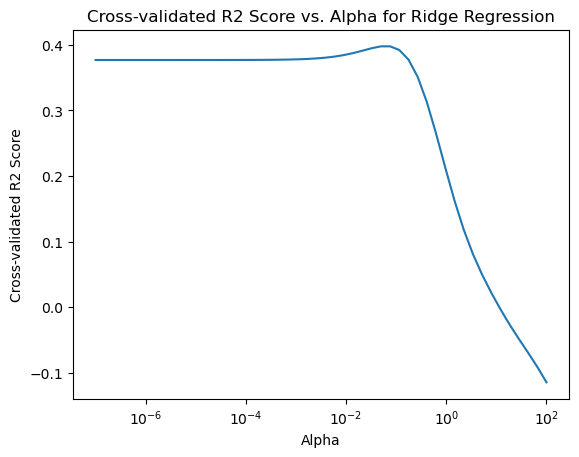

Meilleur alpha : 0.07543120063354623
Meilleur R2 associé : 0.39746435055130325
Mean squared error: 0.03
R2_test: 0.60


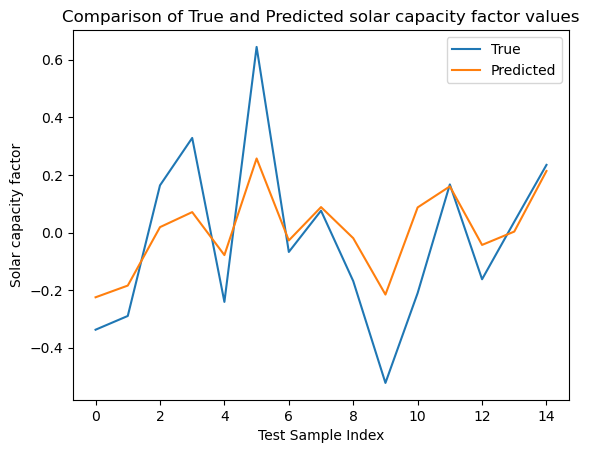

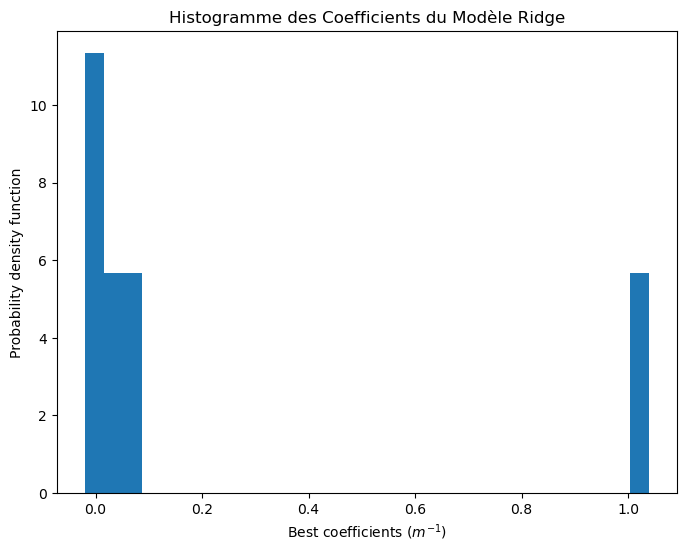

In [38]:
#Réaliser une cross validation sur X_train, y_train
value_tab = {}
for alpha in np.logspace(-7, 2, 50):
    model = Ridge(alpha=alpha)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    value_tab[alpha] = cv_scores.mean()


alphas = list(value_tab.keys())
cv_means = list(value_tab.values())

plt.plot(alphas, cv_means)
plt.xlabel('Alpha')
plt.ylabel('Cross-validated R2 Score')
plt.xscale('log')  #  échelle logarithmique sur l'axe x pour une meilleure visualisation
plt.title('Cross-validated R2 Score vs. Alpha for Ridge Regression')
plt.show()


def find_best_alpha(value_tab):
    best_alpha = max(value_tab, key=value_tab.get)
    best_r2 = value_tab[best_alpha]
    
    return best_alpha, best_r2

# Utilisation de la fonction pour trouver le meilleur alpha
best_alpha, best_r2_ridge = find_best_alpha(value_tab)

print(f"Meilleur alpha : {best_alpha}")
print(f"Meilleur R2 associé : {best_r2_ridge}")

#prédiction 

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)


y_pred = ridge_model.predict(X_test)
mse_ridge=mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f"
        % mse_ridge)

# plot results
r2_test_ridge = ridge_model.score(X_test, y_test)
print("R2_test: %.2f"
        %ridge_model.score(X_test, y_test))


plt.figure()
plt.plot(y_test, label="True")
plt.plot(y_pred, label="Predicted")
plt.title('Comparison of True and Predicted solar capacity factor values') 
plt.xlabel('Test Sample Index')  
plt.ylabel('Solar capacity factor')  
plt.legend()


coefs_best = ridge_model.coef_

# Création de l'histogramme des coefficients

plt.figure(figsize=(8, 6)) 
plt.hist(coefs_best, bins=30, density=True)  
plt.xlabel(r'Best coefficients ($m^{-1}$)')
plt.ylabel('Probability density function')
plt.title('Histogramme des Coefficients du Modèle Ridge')
plt.show()

### A.2 Ridge Nested cross validation

Ce programme utilise une **validation croisée imbriquée** pour optimiser le paramètre de régularisation \(\alpha\) d'un modèle Ridge et évaluer ses performances.

#### Démarche :
1. **Partitionnement :**
   - Les données sont divisées en un jeu d'entraînement/test (20 % pour le test).
   - Une validation croisée externe (7-fold) évalue les performances globales.

2. **Validation croisée interne :**
   - Chaque partition externe est utilisée pour explorer différentes valeurs de \(\alpha\) via une validation croisée interne (6-fold).
   - Le modèle est évalué en termes de \(R^2\) pour sélectionner la meilleure valeur de \(\alpha\).

3. **Évaluation finale :**
   - Le modèle optimisé est testé sur les données externes.
   - Les performances sont mesurées avec le \(R^2\) et l'erreur quadratique moyenne (MSE).

Cette méthode réduit le surapprentissage et garantit une évaluation rigoureuse des performances, tout en sélectionnant le paramètre optimal pour améliorer la précision prédictive.


In [39]:
#nested cross validation 

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
ALPHA_RNG_RIDGE = np.logspace(-7, 2, 50)
complexity_rng = ALPHA_RNG_RIDGE

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Number of splits for test
n_splits_test = 7  
n_splits_cv = n_splits_test - 1

# Define k-fold iterator for the test set
kf_test = KFold(n_splits=n_splits_test)

# Loop over the train and test indices
r2_test_arr = np.empty((n_splits_test,))
mse_test_arr = np.empty((n_splits_test,))
complexity_best_arr = np.empty((n_splits_test,))

for itest, (cv_index, test_index) in enumerate(kf_test.split(X)):  # Use X_test, y_test for testing
    # Select cross-validation data
    X_cv = X[cv_index]
    y_cv = y[cv_index]

    # Select test set for later
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]

    # Declare empty arrays in which to store r2 scores and coefficients
    r2_validation = np.empty(complexity_rng.shape)
    coefs = np.empty((len(complexity_rng), X.shape[1]))

    # Loop over regularization-parameter values
    for k, complexity in enumerate(complexity_rng):
        # Define the Ridge estimator for particular regularization-parameter value
        reg = Ridge(alpha=complexity)

        # Get r2 test scores from k-fold cross-validation
        r2_validation_arr = cross_val_score(reg, X_cv, y_cv, cv=n_splits_cv, scoring="r2")

        # Get r2 expected prediction score by averaging over test scores
        r2_validation[k] = r2_validation_arr.mean()

        # Save coefficients
        reg.fit(X_cv, y_cv)
        coefs[k] = reg.coef_

    # Get the best values of the regularization parameter, prediction R2, and coefficients
    k_best = np.argmax(r2_validation)
    complexity_best_arr[itest] = complexity_rng[k_best]

    # Define the Ridge estimator for best regularization parameter value
    reg = Ridge(alpha=complexity_best_arr[itest])

    # Fit on train data
    reg.fit(X_cv, y_cv)
    y_pred = reg.predict(X_test_fold)

    # Test on test data and add r2_test and mse_test values to the lists
    r2_test_arr[itest] = reg.score(X_test_fold, y_test_fold)
    mse_test_arr[itest]= mean_squared_error(y_test_fold, y_pred)


# Get mean R2 and MSE
r2_test_mean = r2_test_arr.mean()
r2_test_std = r2_test_arr.std()

mse_test_mean = mse_test_arr.mean()
mse_test_std = mse_test_arr.std()

complexity_best_mean = complexity_best_arr.mean()

print('Test R2: {:.2f} +/- {:.2f} (1/2 std)'.format(r2_test_mean, r2_test_std / 2))
print('Mean squared error: {:.2f} +/- {:.2f} (1/2 std)'.format(mse_test_mean, mse_test_std / 2))
print('Mean best alpha: {:.2e}'.format(complexity_best_mean))


Test R2: 0.35 +/- 0.23 (1/2 std)
Mean squared error: 0.02 +/- 0.01 (1/2 std)
Mean best alpha: 1.50e-01


## B.1 Lasso regression

La régression **Lasso** (Least Absolute Shrinkage and Selection Operator) est utilisée pour sélectionner les variables pertinentes tout en réduisant la complexité du modèle. Elle applique une pénalisation \(L_1\), ce qui force certains coefficients à devenir exactement nuls. Cela est particulièrement utile pour :
- Identifier les variables les plus importantes dans un ensemble de données à haute dimension.
- Réduire le risque de surapprentissage (overfitting) en simplifiant le modèle.

#### Démarche :
1. **Optimisation du paramètre de régularisation \(\alpha\) :**
   - Une recherche sur une plage logarithmique de valeurs pour \(\alpha\) (\(10^{-7}\) à \(10^{-1}\)) est réalisée.
   - Une validation croisée (5-fold) est utilisée pour évaluer le score \(R^2\) associé à chaque \(\alpha\).
   - Le meilleur \(\alpha\) est sélectionné en maximisant le score \(R^2\).

2. **Entraînement du modèle :**
   - Une fois le meilleur \(\alpha\) identifié, le modèle est ajusté sur les données d'entraînement.

3. **Évaluation des performances :**
   - Le modèle est évalué sur les données de test en calculant :
     - Le coefficient de détermination (\(R^2\)) pour mesurer la qualité prédictive.
     - L'erreur quadratique moyenne (MSE) pour quantifier l'écart moyen entre les prédictions et les valeurs réelles.

4. **Comparaison visuelle :**
   - Les prédictions du modèle sont comparées aux valeurs réelles à l'aide d'un graphique, permettant d'observer la précision des prédictions pour les facteurs de capacité solaire.



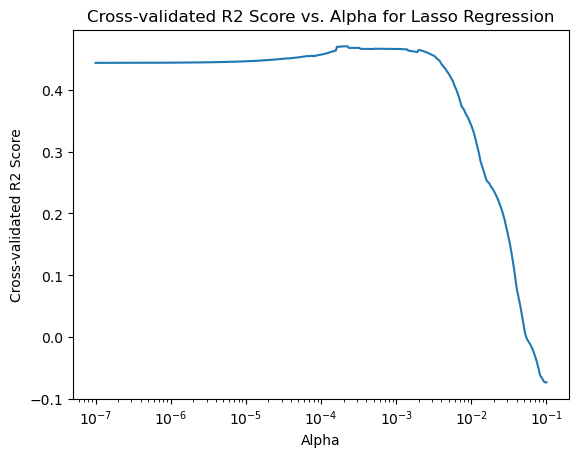

Meilleur alpha : 0.00018134978041964953
Meilleur R2 associé : 0.47024159252116265
Mean squared error: 0.02
R2_test: 0.70


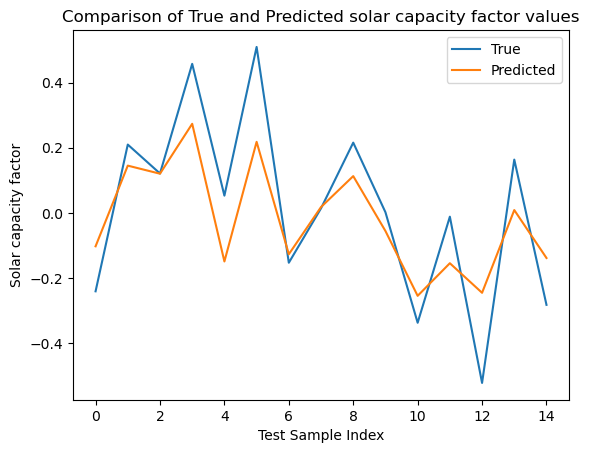

In [40]:
# Fit the model
from sklearn.linear_model import Lasso

value_tab = {}
for alpha in np.logspace(-7, -1, 500):
    model = Lasso(alpha=alpha, tol=1e-1, max_iter=10000000)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    value_tab[alpha] = cv_scores.mean()


# Convertissez les clés et les valeurs en listes
alphas = list(value_tab.keys())
cv_means = list(value_tab.values())

plt.plot(alphas, cv_means)
plt.xlabel('Alpha')
plt.ylabel('Cross-validated R2 Score')
plt.xscale('log')
plt.title('Cross-validated R2 Score vs. Alpha for Lasso Regression')
plt.show()

best_alpha, best_r2_lasso = find_best_alpha(value_tab)

print(f"Meilleur alpha : {best_alpha}")
print(f"Meilleur R2 associé : {best_r2_lasso}")
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mse_lasso =mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"
        % mse_lasso )

# plot results
r2_test_lasso = lasso_model.score(X_test, y_test)
print("R2_test: %.2f"
        %lasso_model.score(X_test, y_test))

# plot results
plt.figure()
plt.plot(y_test, label="True")
plt.plot(y_pred, label="Predicted")
plt.title('Comparison of True and Predicted solar capacity factor values') 
plt.xlabel('Test Sample Index')  
plt.ylabel('Solar capacity factor')  
plt.legend()


### B.2 Lasso Nested cross validation

De la même manière que pour la régression ridge, on optimise alpha pour la régression Lasso via validation croisée imbriquée afin d'améliorer les performances prédictives et sélectionner les variables pertinentes.

In [41]:
ALPHA_RNG_LASSO = np.logspace(-7, 2, 50)
complexity_rng = ALPHA_RNG_LASSO

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Number of splits for test
n_splits_test = 7 
# Number of splits for cross-validation
n_splits_cv = n_splits_test - 1

# Define k-fold iterator for the test set
kf_test = KFold(n_splits=n_splits_test)

# Loop over the train and test indices
r2_test_arr = np.empty((n_splits_test,))
mse_test_arr = np.empty((n_splits_test,))
complexity_best_arr = np.empty((n_splits_test,))

for itest, (cv_index, test_index) in enumerate(kf_test.split(X)):  # Use X_test, y_test for testing
    # Select cross-validation data
    X_cv = X[cv_index]
    y_cv = y[cv_index]

    # Select test set for later
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]

    # Declare empty arrays in which to store r2 scores and coefficients
    r2_validation = np.empty(complexity_rng.shape)
    coefs = np.empty((len(complexity_rng), X.shape[1]))

    # Loop over regularization-parameter values
    for k, complexity in enumerate(complexity_rng):
        # Define the Lasso estimator for particular regularization-parameter value
        reg = Lasso(alpha=complexity,tol = 1e-1, max_iter=1000000000)

        # Get r2 test scores from k-fold cross-validation
        r2_validation_arr = cross_val_score(reg, X_cv, y_cv, cv=n_splits_cv, scoring="r2")

        # Get r2 expected prediction score by averaging over test scores
        r2_validation[k] = r2_validation_arr.mean()

        # Save coefficients
        reg.fit(X_cv, y_cv)
        coefs[k] = reg.coef_

    # Get the best values of the regularization parameter, prediction R2, and coefficients
    k_best = np.argmax(r2_validation)
    complexity_best_arr[itest] = complexity_rng[k_best]

    # Define the Lasso estimator for best regularization parameter value
    reg = Lasso(alpha=complexity_best_arr[itest])

    # Fit on train data
    reg.fit(X_cv, y_cv)
    y_pred = reg.predict(X_test_fold)

    # Test on test data and add r2_test and mse_test values to the lists
    r2_test_arr[itest] = reg.score(X_test_fold, y_test_fold)
    mse_test_arr[itest]= mean_squared_error(y_test_fold, y_pred)

# Get mean R2 and MSE

r2_test_mean_lasso = r2_test_arr.mean()
r2_test_std = r2_test_arr.std()

mse_test_mean_lasso = mse_test_arr.mean()
mse_test_std = mse_test_arr.std()

complexity_best_mean = complexity_best_arr.mean()

print('Test R2: {:.2f} +/- {:.2f} (1/2 std)'.format(r2_test_mean, r2_test_std / 2))
print('Mean squared error: {:.2f} +/- {:.2f} (1/2 std)'.format(mse_test_mean_lasso, mse_test_std / 2))
print('Mean best alpha: {:.2e}'.format(complexity_best_mean))


Test R2: 0.35 +/- 0.24 (1/2 std)
Mean squared error: 0.02 +/- 0.01 (1/2 std)
Mean best alpha: 1.85e-03


## C. K-nearest model

Nous avons utilisé le modèle de régression **k-plus proches voisins (k-NN)** pour explorer les relations potentiellement non linéaires entre les variables. Contrairement aux modèles Ridge et Lasso, qui imposent des hypothèses linéaires et une régularisation sur les coefficients, k-NN est une méthode non paramétrique qui ne fait aucune supposition sur la forme des relations. Cette approche est particulièrement pertinente pour identifier des motifs complexes ou non linéaires dans les données climatiques et énergétiques, offrant ainsi une perspective complémentaire à celle des modèles linéaires.

#### Démarche :
1. **Optimisation du paramètre \(k\) :**
   - Une recherche sur une plage de valeurs pour \(k\) (nombre de voisins) est réalisée, en évaluant le score \(R^2\) sur le jeu de test pour chaque valeur.
   - Le \(k\) optimal est sélectionné en maximisant le score \(R^2\).

2. **Entraînement et évaluation :**
   - Le modèle k-NN est ajusté avec le \(k\) optimal sur les données d'entraînement.
   - Les performances sont évaluées sur les données de test à l'aide du coefficient \(R^2\) et de l'erreur quadratique moyenne (MSE).

3. **Analyse des résultats :**
   - Un graphique montre l'évolution du score \(R^2\) en fonction de \(k\), permettant de visualiser l'impact du choix du nombre de voisins.
   - Une comparaison visuelle entre les prédictions et les valeurs réelles est réalisée.



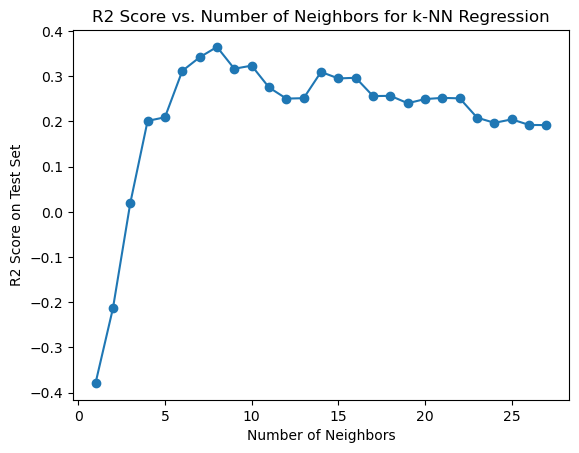

Mean squared error: 0.04
Best number of neighbors: 8
Best R2 on validation set: 0.36
R2 on test set: 0.36


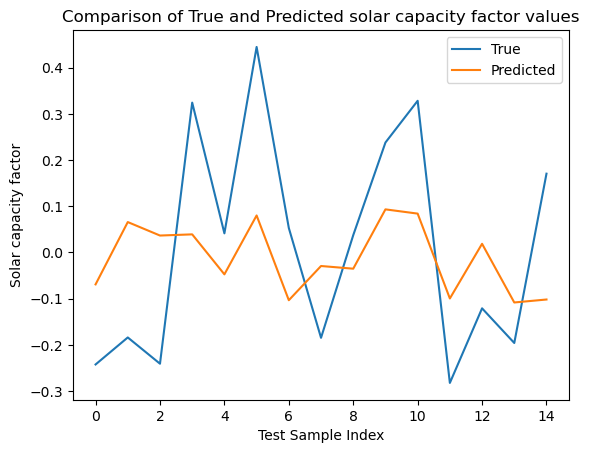

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import numpy as np

# Define the number of neighbors to consider
neighbors_rng = range(1, 28)  

# Loop over the number of neighbors
r2_validation = np.empty(len(neighbors_rng))
for k, n_neighbors in enumerate(neighbors_rng):
    # Define the k-NN regressor for a particular number of neighbors
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit on training data
    knn_reg.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn_reg.predict(X_test)

    # Calculate R2 score
    r2_validation[k] = r2_score(y_test, y_pred)

# Get the best number of neighbors and prediction R2
best_k = neighbors_rng[np.argmax(r2_validation)]
best_r2_knn = np.max(r2_validation)

# Define the k-NN regressor for the best number of neighbors
knn_reg = KNeighborsRegressor(n_neighbors=best_k)

# Fit on training data
knn_reg.fit(X_train, y_train)

plt.plot(neighbors_rng, r2_validation, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2 Score on Test Set')
plt.title('R2 Score vs. Number of Neighbors for k-NN Regression')
plt.show()

# Test on test data
y_pred_test = knn_reg.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
plt.figure()
plt.plot(y_test, label="True")
plt.plot(y_pred, label="Predicted")
plt.title('Comparison of True and Predicted solar capacity factor values') 
plt.xlabel('Test Sample Index')  
plt.ylabel('Solar capacity factor')  
plt.legend()

mse_knn=mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"
        % mse_knn)

print('Best number of neighbors: {}'.format(best_k))
print('Best R2 on validation set: {:.2f}'.format(best_r2_knn))
print('R2 on test set: {:.2f}'.format(r2_test))


## D.Bilan: Comparaison des différents modèles

0.024860767509099626
0.02418370124690427


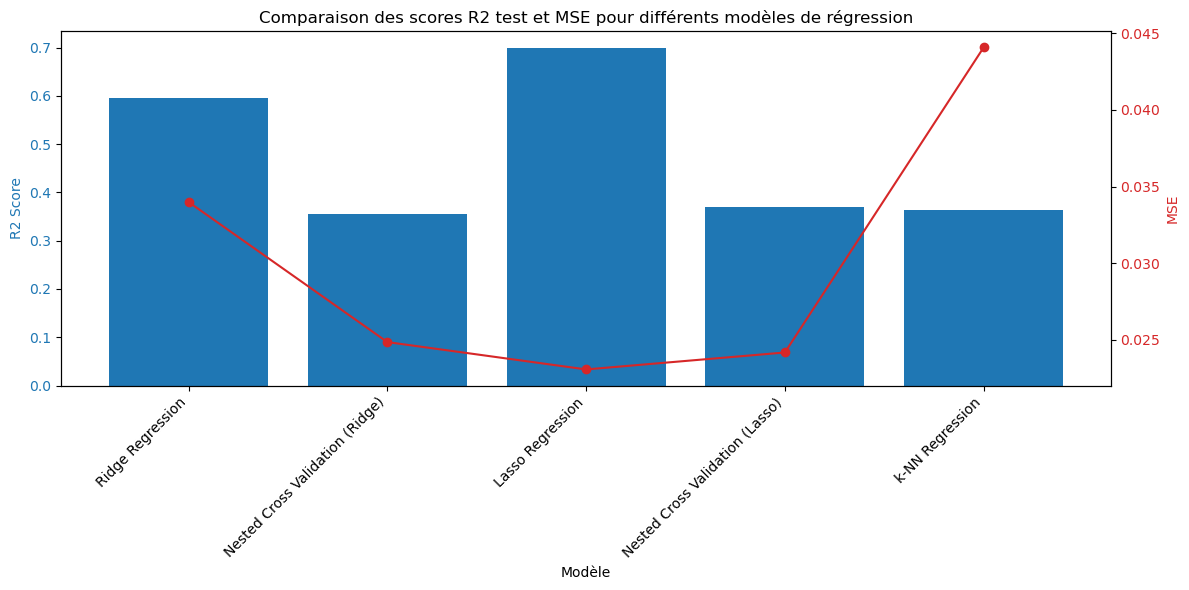

In [43]:

model_names = ['Ridge Regression', 'Nested Cross Validation (Ridge)', 'Lasso Regression', 'Nested Cross Validation (Lasso)', 'k-NN Regression']
r2_scores = [r2_test_ridge, r2_test_mean, r2_test_lasso, r2_test_mean_lasso, r2_test]  
mse_scores = [mse_ridge, mse_test_mean, mse_lasso, mse_test_mean_lasso, mse_knn]           
print(mse_test_mean)
print(mse_test_mean_lasso)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe pour R2
color = 'tab:blue'
ax1.set_xlabel('Modèle')
ax1.set_ylabel('R2 Score', color=color)
ax1.bar(model_names, r2_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Ajuster les emplacements des graduations et leurs étiquettes
ax1.set_xticks(range(len(model_names)))  # Définir les emplacements des graduations
ax1.set_xticklabels(model_names, rotation=45, ha='right')  

# Axe pour MSE
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MSE', color=color)
ax2.plot(model_names, mse_scores, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et affichage
plt.title('Comparaison des scores R2 test et MSE pour différents modèles de régression')
fig.tight_layout()
plt.show()


### Comparaison de modèles de régression pour prédire les *capacity factors*

Les barres bleues indiquent le score R^2 et et la courbe rouge montre la MSE.

### Modèles testés

- **Ridge Regression**  
  - Généralement un \( R^2 \) correct, montrant une bonne capacité à expliquer la variance.  
  - MSE parfois plus importante, pouvant indiquer des erreurs plus grandes sur certains points.

- **Nested Cross Validation (Ridge)**  
  - Recherche d’hyperparamètres plus robuste.  
  - Souvent un \( R^2 \) un peu moins élevé mais une MSE souvent réduite, gage de meilleures performances moyennes.

- **Lasso Regression**  
  - Favorise la parcimonie en mettant certains coefficients à zéro.  
  - Bon compromis entre variance expliquée et erreur moyenne.

- **Nested Cross Validation (Lasso)**  
  - Comme pour Ridge, la nested CV limite le surapprentissage.  

- **K-NN Regression**  
  - Semble avoir plus de mal à capturer la tendance globale.

### Interprétation générale

En lançant plusieurs fois le notebook (et sur différentes régions), les valeurs numériques de \( R^2 \) et de MSE fluctuent, mais les tendances restent similaires :

- **Maximiser le \( R^2 \)** : privilégier des modèles comme Ridge ou Lasso “non-nested”, qui peuvent atteindre des scores élevés.  
- **Minimiser l’erreur moyenne (MSE)** : opter pour la nested CV (Ridge ou Lasso), qui confère plus de robustesse et réduit souvent la MSE.
- **K-NN** : même s’il peut gérer des non-linéarités, il est souvent moins adapté aux fortes variations climatiques et montre des performances inférieures.

Dans un contexte de **prédiction des capacity factors à partir de données climatiques**, on veillera à équilibrer la part de variance expliquée (\( R^2 \)) et la précision moyenne (MSE) pour mieux répondre aux besoins opérationnels.